# Analysis

In [1]:
#load necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as mplcm
import pandas as pd
from calendar import IllegalMonthError,IllegalWeekdayError
from dateutil.parser import parse
from unidecode import unidecode
from itertools import cycle


def remove_excessive_ws(x):
    if isinstance(x,str):
        return ' '.join(x.split())
    else:
        return x
    

def myunidecode(x):
    if isinstance(x,str):
        return unidecode(x)
    else:
        return x

def remove_short(x):
    if isinstance(x,str):
        tmp = x.split()
        return ' '.join([_x for _x in tmp if len(_x)>2])
    else:
        return x


def plot_ts_cat(colname='DEPARTAMENTO',resampleby='M',thresh= 10,dataset='social',custom_colors = True,linecycle=False):
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines)
    if dataset == 'all':
        dat = data_all
    if dataset == 'social':
        dat = data_social
    vals = dat[colname].unique()
    newvals = []
    for i,val in enumerate(vals):
        tmp = dat[dat[colname] == val].Deaths.resample(resampleby).sum()
        if sum(tmp>thresh)>0:
            newvals.append(val)
    if custom_colors:
        if isinstance(custom_colors,list):
            mycolors = custom_colors
        else:
            NUM_COLORS = len(newvals)

            cm = plt.get_cmap('gist_rainbow')
            cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
            scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
            mycolors = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]
    for i,val in enumerate(newvals):
        tmp = dat[dat[colname] == val].Deaths.resample(resampleby).sum()
        if custom_colors:
            if linecycle:
                tmp.plot(label=val,legend=True,color=mycolors[i],linewidth=3,style = next(linecycler))
            else:
                tmp.plot(label=val,legend=True,color=mycolors[i],linewidth=3)
        else:
            if linecycle:
                tmp.plot(label=val,legend=True,linewidth=3,style = next(linecycler))
            else:
                tmp.plot(label=val,legend=True,color=mycolors[i],linewidth=3)
            
    lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=14)
    return lgd



In [2]:
import matplotlib
%matplotlib inline
plt.style.use('seaborn-whitegrid')
# other options:
# tableau-colorblind10,seaborn-whitegrid,seaborn-paper,seaborn-muted,seaborn-poster

matplotlib.rcParams.update({'font.size': 16})
COLORCYCLE = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
data_social = pd.read_pickle('Data/data_social.pkl')
data_all= pd.read_pickle('Data/data_all.pkl')

In [4]:
# rename date column
data_all.rename(columns={u'FECHA': u'Date'}, inplace=True)
# Set index to date
data_all.index = data_all['Date']
data_social.index = data_social['Date']

# Create column to simplify aggregation and resampling
data_all['Deaths'] = [1.0]*data_all.shape[0]
data_social['Deaths'] = [1.0]*data_social.shape[0]

# TODO 
plot jac jal CC (bar or time, check what looks good and tells story) 

# Gender stats

### Homicide data

In [17]:
print(data_all['SEXO'].value_counts())
print ('\npercentages:')
print(data_all['SEXO'].value_counts(normalize=True))

MASCULINO     62109
FEMENINO       5725
NO REPORTA       14
Name: SEXO, dtype: int64

percentages:
MASCULINO     0.915414
FEMENINO      0.084380
NO REPORTA    0.000206
Name: SEXO, dtype: float64


### Social leader data

In [18]:
print(data_social['SEXO'].value_counts())
print ('\npercentages:')
print(data_social['SEXO'].value_counts(normalize=True))

MASCULINO    290
FEMENINO      49
LGTBI         18
Name: SEXO, dtype: int64

percentages:
MASCULINO    0.812325
FEMENINO     0.137255
LGTBI        0.050420
Name: SEXO, dtype: float64


## Bar plots of gender in Social Leaders data

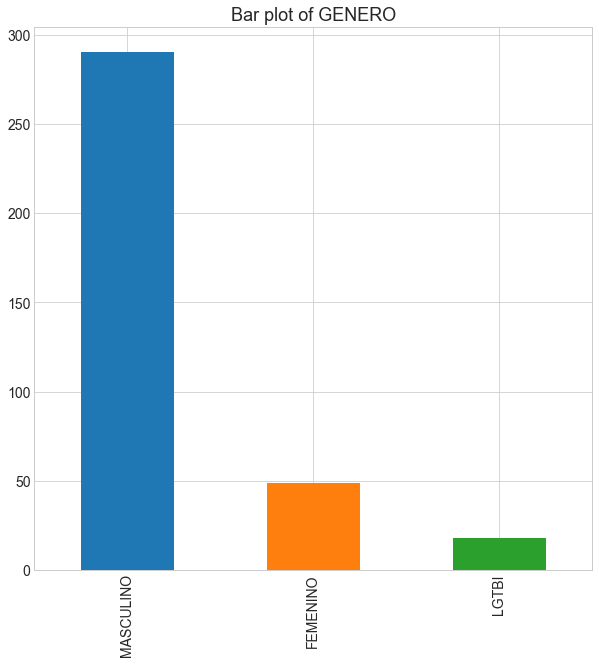

In [19]:
plt.figure(figsize=(10,10))
plt.style.use('seaborn-whitegrid')
counts = data_social[u'SEXO'].value_counts()
counts.plot(kind='bar')
plt.title('Bar plot of GENERO',fontsize=18)
plt.tick_params(labelsize=14)
#plt.savefig('ImagesPaper/bar_gender.png')
plt.show()

## Type of weapon used




### Homicide data

In [21]:
print(data_all['ARMA EMPLEADA'].value_counts())
print ('\npercentages:')
print(data_all['ARMA EMPLEADA'].value_counts(normalize=True))

ARMA FUEGO                      59643
ARMA BLANCA                     16663
CONTUNDENTES                     2601
EXPLOSIVO                         621
CUERDA/SOGA/CADENA                316
BOLSA PLASTICA                    129
REPORTADO                          87
GASOLINA                           44
SIN EMPLEO ARMAS                   36
VENENO                             27
CINTAS/CINTURON                    27
ALMOHADA                           27
SUSTANCIAS TOXICAS                 15
COMBUSTIBLE                        15
ARTEFACTO INCENDIARIO               9
CINTAS                              8
ACIDO                               4
PRENDAS VESTIR                      4
QUIMICOS                            3
ESCOPOLAMINA                        2
ROCKET                              1
MEDICAMENTOS                        1
POLVORA(FUEGOS PIROTECNICOS)        1
LIQUIDOS                            1
JERINGA                             1
GASES                               1
Name: ARMA E

### Social leader data

In [22]:
print(data_social['ARMA EMPLEADA'].value_counts())
print ('\npercentages:')
print(data_social['ARMA EMPLEADA'].value_counts(normalize=True))

ARMA FUEGO              327
ARMA BLANCA              16
OBJETO CONTUNDENTE        3
POR DETERMINAR            2
ARMA FUEGO (TORTURA)      2
VEHICULO                  1
CUERDA/SOGA/CADENA        1
CORTOCONTUNDENTE          1
Name: ARMA EMPLEADA, dtype: int64

percentages:
ARMA FUEGO              0.926346
ARMA BLANCA             0.045326
OBJETO CONTUNDENTE      0.008499
POR DETERMINAR          0.005666
ARMA FUEGO (TORTURA)    0.005666
VEHICULO                0.002833
CUERDA/SOGA/CADENA      0.002833
CORTOCONTUNDENTE        0.002833
Name: ARMA EMPLEADA, dtype: float64


### bar plot

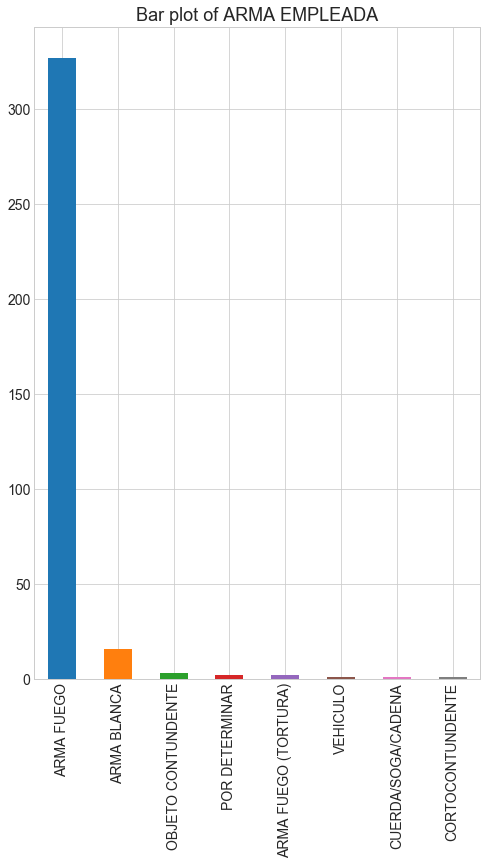

In [28]:
counts = data_social[u'ARMA EMPLEADA'].value_counts()
plt.figure(figsize=(8,12))
counts.plot(kind='bar')
counts.to_csv('PlotData/bar_arma.csv')
plt.title('Bar plot of ARMA EMPLEADA',fontsize=18)
plt.tick_params(labelsize=14)
plt.savefig('Images/bar_arma.jpg')
plt.show()

## Type of organization social leaders belonged to

In [30]:
counts = data_social[u'TIPO DE ORGANIZACION'].value_counts()
counts

COMUNAL                     136
INDIGENA                     82
CAMPESINO                    29
SINDICAL                     21
LGTBI                        18
VICTIMAS                     14
AFRO                         13
RESTITUCION TIERRAS           9
DD.HH.                        7
JUVENIL                       6
POLITICO                      5
CULTURAL                      5
SOCIAL                        3
MINERO                        2
AMBIENTALISTA                 1
LIDER                         1
ADMINISTRACION MUNICIPAL      1
SOCIAL / PERIODISTA           1
ACTIVISTA                     1
Name: TIPO DE ORGANIZACION, dtype: int64

# Plotting SL and homicide data overall yearly counts

In [83]:
data_social['Deaths'].resample('A').sum()

Date
2012-12-31    60.0
2013-12-31    56.0
2014-12-31    45.0
2015-12-31    56.0
2016-12-31    67.0
2017-12-31    74.0
Freq: A-DEC, Name: Deaths, dtype: float64

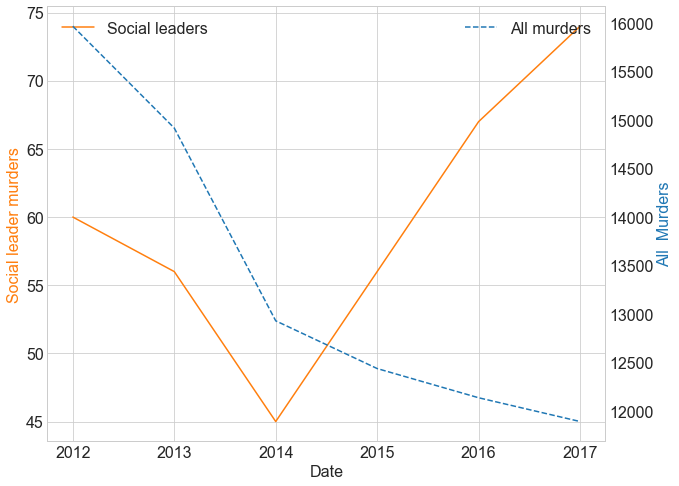

In [74]:
newdf = pd.concat([data_social['Deaths'].resample('A').sum(), data_all['Deaths'].resample('A').sum()],axis=1)
newdf.columns = ['social leaders','all murders']
fig, ax1 = plt.subplots(figsize=(10,8))

ax2 = ax1.twinx()

newdf['all murders'].plot(ax=ax2,color=COLORCYCLE[0],style='--',label = 'All murders')
newdf['social leaders'].plot(ax=ax1,color=COLORCYCLE[1],style='-',label = 'Social leaders')#style='r-'

ax1.set_xlabel('Date')
ax1.set_ylabel('Social leader murders', color=COLORCYCLE[1])
ax2.set_ylabel('All  Murders', color=COLORCYCLE[0])
ax2.legend(loc=0)
ax1.legend()
plt.grid()

plt.show()

### Evolucion de anyo y quarto

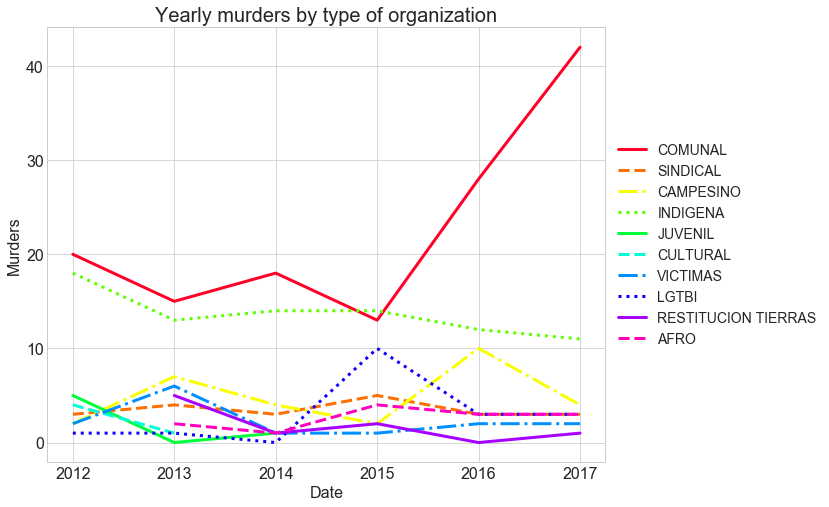

In [40]:
plt.figure(figsize=(10,8))
plt.title('Yearly murders by type of organization',fontsize=20)
lgd = plot_ts_cat(colname=u'TIPO DE ORGANIZACION',resampleby='A',thresh= 3.0,custom_colors=True,linecycle=True)
#tmpdf = plot_ts_cat_data(colname=u'TIPO DE ORGANIZACION',resampleby='A',thresh= 3.0,custom_colors=False)
#tmpdf.to_csv('PlotData/time_year_tipoorg.csv')
plt.tick_params(labelsize=16)
plt.ylabel('Murders',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.savefig('ImagesPaper/time_year_tipoorg.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

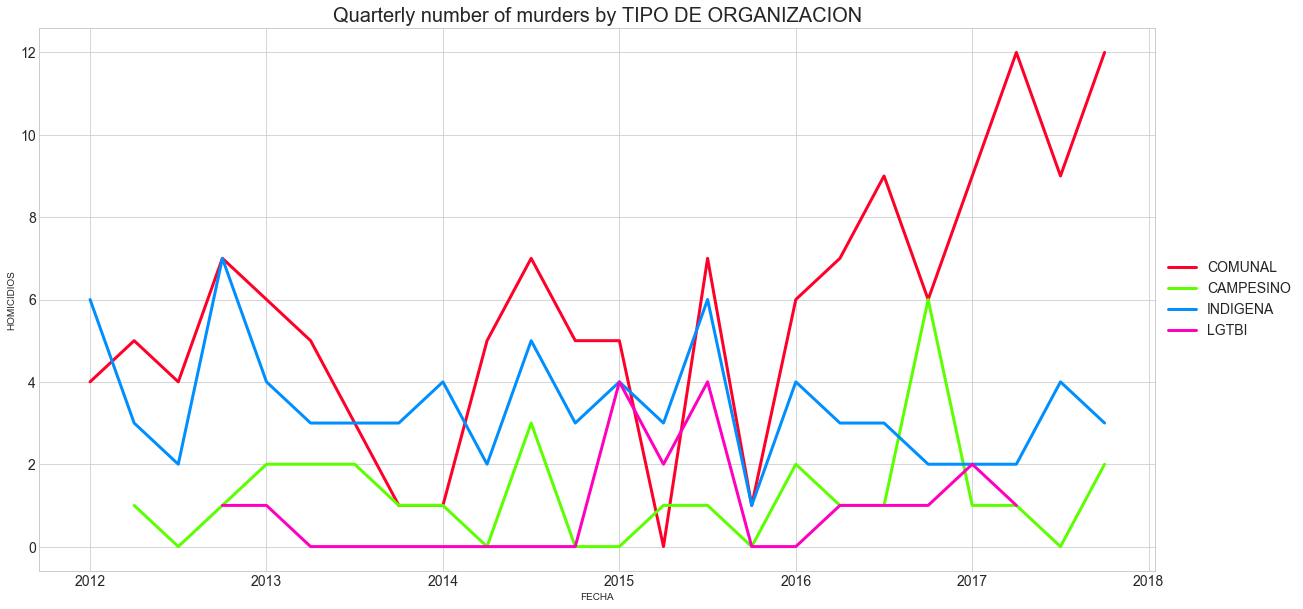

In [32]:
plt.figure(figsize=(20,10))
plt.title('Quarterly number of murders by TIPO DE ORGANIZACION',fontsize=20)
lgd = plot_ts_cat(colname=u'TIPO DE ORGANIZACION',resampleby='Q',thresh= 3.0)
plt.tick_params(labelsize=14)
plt.ylabel('HOMICIDIOS')
plt.savefig('ImagesPaper/time_quart_tipoorg.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

# Breaking down the COMUNAL category
A look at the organization names reveals that a large number of comunal leaders are JAC

## prepare new column names

In [29]:
# Manual cleaning of one misspelling 
searchlist = ['JUNTA D EQACCION COUMUNAL']
data_social.loc[data_social['ORGANIZACION A LA QUE PERTENECE'].str.contains('|'.join(searchlist))==True,'ORGANIZACION A LA QUE PERTENECE'] = 'PRESIDENTE JUNTA DE ACCION COMUNAL VEREDA BUENOS AIRES, FILIAL SINDICATO DE TRABAJADORES  DE L CORDON FRONTERIZO DE PUTUMAYO- CORREDOR  PUERTO VEGA- TETEYE Y MIEMBRO DE MARCHA PATRIOTICA '

In [30]:
#searchlist = ['JAC,','JAC.','JAC ','JUNTA DE ACCION COMUNAL','CONSEJO COMUNAL','CONSEJO COMUNITARIO','ASOCIACION COMUNITARIA','ASOCOMUNAL','JAL ']
searchlist = ['JAC,','JAC.','JAC ','JUNTA DE ACCION COMUNAL','CONSEJO COMUNITARIO','JAL ']
data_social['JAC/JAL/CC']=0
data_social.loc[data_social['NOMBRE DE LA ORGANIZACION'].str.contains('|'.join(searchlist))==True,'JAC/JAL/CC']=1
data_social.loc[data_social['ORGANIZACION A LA QUE PERTENECE'].str.contains('|'.join(searchlist))==True,'JAC/JAL/CC']=1

searchlistJAC = ['JAC,','JAC.','JAC ','JUNTA DE ACCION COMUNAL']
data_social['JAC']=0
data_social.loc[data_social['NOMBRE DE LA ORGANIZACION'].str.contains('|'.join(searchlistJAC))==True,'JAC']=1
data_social.loc[data_social['ORGANIZACION A LA QUE PERTENECE'].str.contains('|'.join(searchlistJAC))==True,'JAC']=1

searchlistJAL = ['JAL ']
data_social['JAL']=0
data_social.loc[data_social['NOMBRE DE LA ORGANIZACION'].str.contains('|'.join(searchlistJAL))==True,'JAL']=1
data_social.loc[data_social['ORGANIZACION A LA QUE PERTENECE'].str.contains('|'.join(searchlistJAL))==True,'JAL']=1

searchlistJAL = ['CONSEJO COMUNITARIO']
data_social['CC']=0
data_social.loc[data_social['NOMBRE DE LA ORGANIZACION'].str.contains('|'.join(searchlistJAL))==True,'CC']=1
data_social.loc[data_social['ORGANIZACION A LA QUE PERTENECE'].str.contains('|'.join(searchlistJAL))==True,'CC']=1
# create data frame of comunal category only 
dfcomunal = data_social[data_social['TIPO DE ORGANIZACION']=='COMUNAL']

## What are the organization names and roles in the organization that do not fall into the JAC/CC/JAL category?

In [33]:
dfcomunal[dfcomunal['JAC/JAL/CC']==0][['NOMBRE DE LA ORGANIZACION','ORGANIZACION A LA QUE PERTENECE']]

,NOMBRE DE LA ORGANIZACION,ORGANIZACION A LA QUE PERTENECE
Date,,
2012-03-11,ASOCOMUNAL,ASOCOMUNAL
2012-05-03,SINTRAOFAN,INTEGRANRTE SINTRAOFAN
2012-01-07,BELLA FLOR,"LIDER COMUNAL, BARRIO BELLA FLOR LOCALIDAD CIU..."
2012-08-30,NaN,NaN
2012-10-17,NO REPORTA,NO REPORTA
2012-12-15,ASOCAMPROV-LIBERTAD,ASOCIACION CAMPESINA DE MORCOTE Y LA PROVINCIA...
2013-05-09,PROCESO ORGANIZATIVO CENTRO COMUNITARIO CEPIA,PROCESO ORGANIZATIVO CENTRO COMUNITARIO CEPIA
2013-05-25,NaN,INTEGRANTE
2014-09-28,ASOCIACION COMUNITARIA CEJAID,ASOCIACION COMUNITARIA CEJAID/SINDICATO NACION...


## plotting JAC, COMUNAL, etc

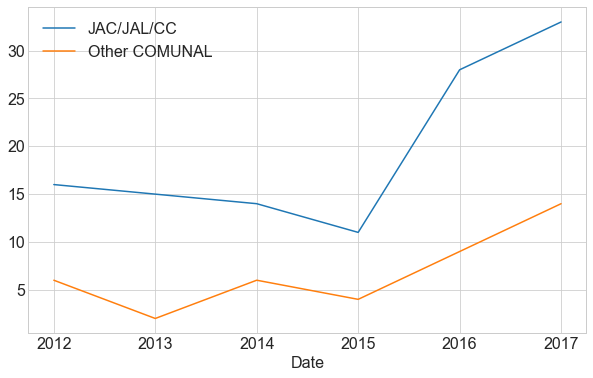

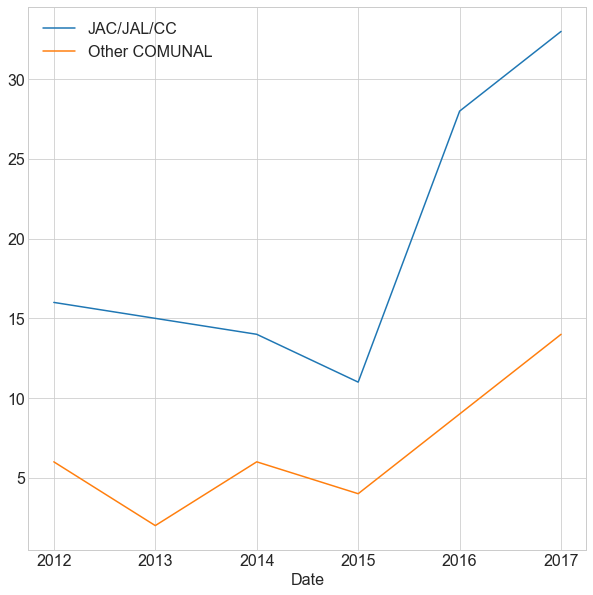

In [75]:
plt.figure(figsize=(10,6))
data_social[data_social['JAC/JAL/CC']==1]['Deaths'].resample('A').sum().plot(label='JAC/JAL/CC')
dfcomunal[dfcomunal['JAC/JAL/CC']==0]['Deaths'].resample('A').sum().plot(label='Other COMUNAL')
plt.legend()
plt.savefig('ImagesPaper/JACJALCC_vs_ComunalOtra.png')
plt.show()

plt.figure(figsize=(10,10))
data_social[data_social['JAC/JAL/CC']==1]['Deaths'].resample('A').sum().plot(label='JAC/JAL/CC')
dfcomunal[dfcomunal['JAC/JAL/CC']==0]['Deaths'].resample('A').sum().plot(label='Other COMUNAL')
plt.legend()
plt.savefig('ImagesPaper/JACJALCC_vs_ComunalOtraSQUARE.png')
plt.show()

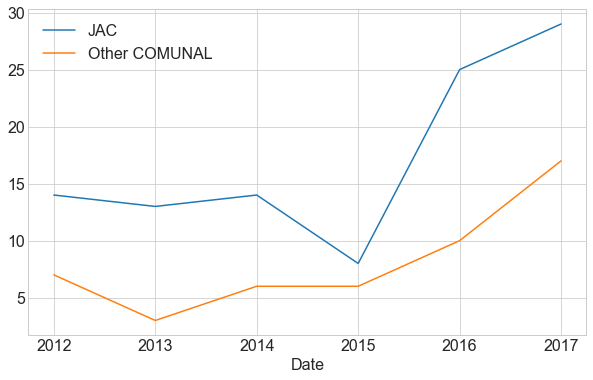

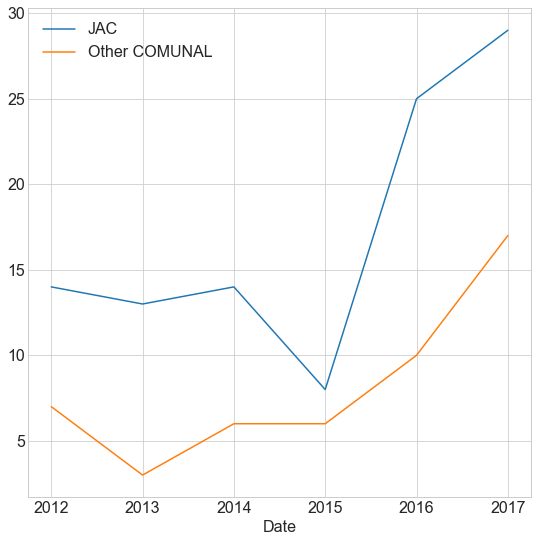

In [73]:
plt.figure(figsize=(10,6))
data_social[data_social['JAC']==1]['Deaths'].resample('A').sum().plot(label='JAC')
dfcomunal[dfcomunal['JAC']==0]['Deaths'].resample('A').sum().plot(label='Other COMUNAL')
plt.legend()
plt.savefig('ImagesPaper/JAC_vs_ComunalOtra.png')
plt.show()

plt.figure(figsize=(9,9))
data_social[data_social['JAC']==1]['Deaths'].resample('A').sum().plot(label='JAC')
dfcomunal[dfcomunal['JAC']==0]['Deaths'].resample('A').sum().plot(label='Other COMUNAL')
plt.legend()
plt.savefig('ImagesPaper/JAC_vs_ComunalOtraSQUARE.png')
plt.show()

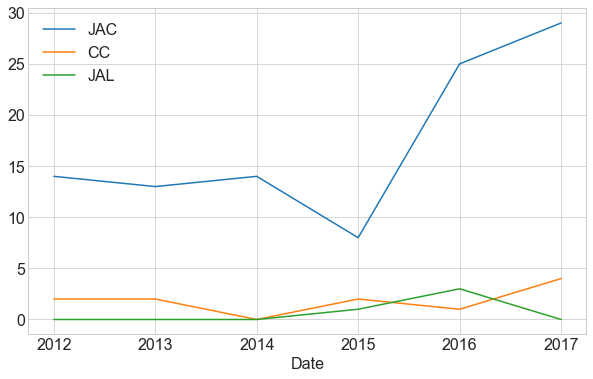

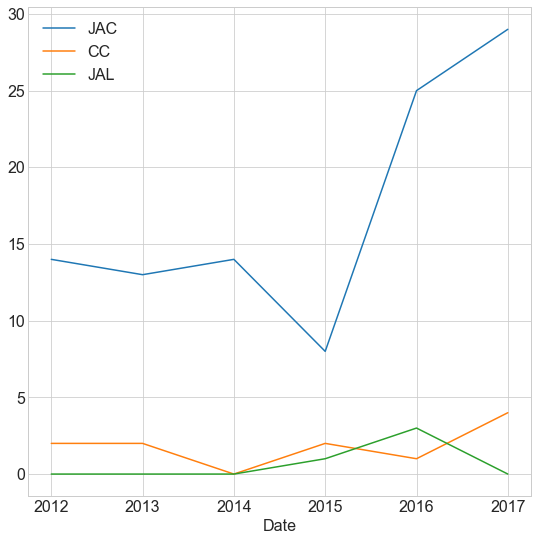

In [70]:
df1 = data_social[data_social['JAC']==1]['Deaths'].resample('A').sum()
df2 = data_social[data_social['CC']==1]['Deaths'].resample('A').sum()
df3 = data_social[data_social['JAL']==1]['Deaths'].resample('A').sum()
tmpdf = pd.concat((df1,df2,df3),axis=1)
tmpdf.fillna(0,inplace=True)
tmpdf.columns = ['JAC','CC','JAL']

tmpdf.plot(figsize=(10,6))
plt.legend()
plt.savefig('ImagesPaper/JAC_JAL_CC_time.png')
plt.show()


tmpdf.plot(figsize=(9,9))
plt.legend()
plt.savefig('ImagesPaper/JAC_JAL_CC_timeSQUARE.png')
plt.show()

JAC    103
CC      11
JAL      4
dtype: int64


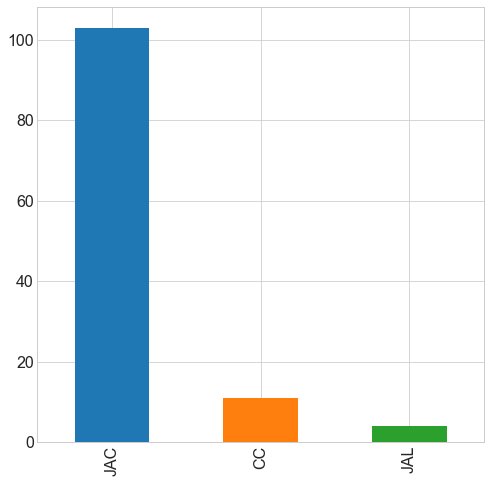

In [82]:
counts = data_social[['JAC','CC','JAL']].sum(0)
print(counts)
plt.figure(figsize=(8,8))
counts.plot(kind='bar')
plt.savefig('ImagesPaper/JAC_JAL_CC_bar.png')
plt.show()

### evolucion

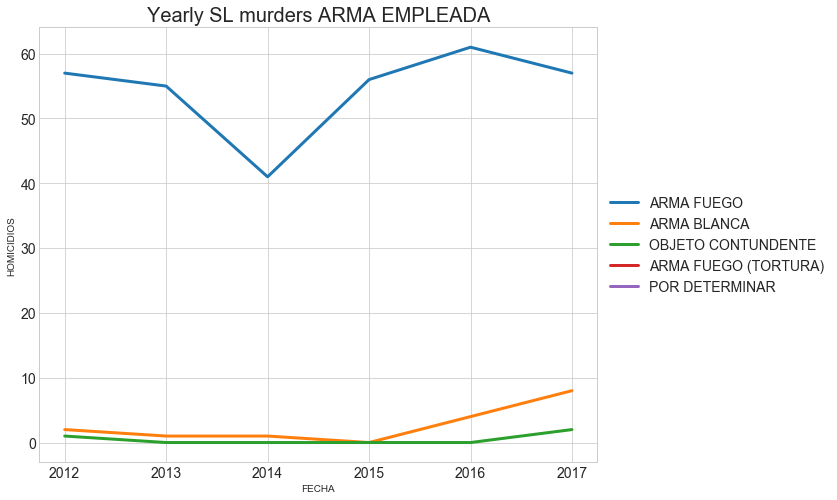

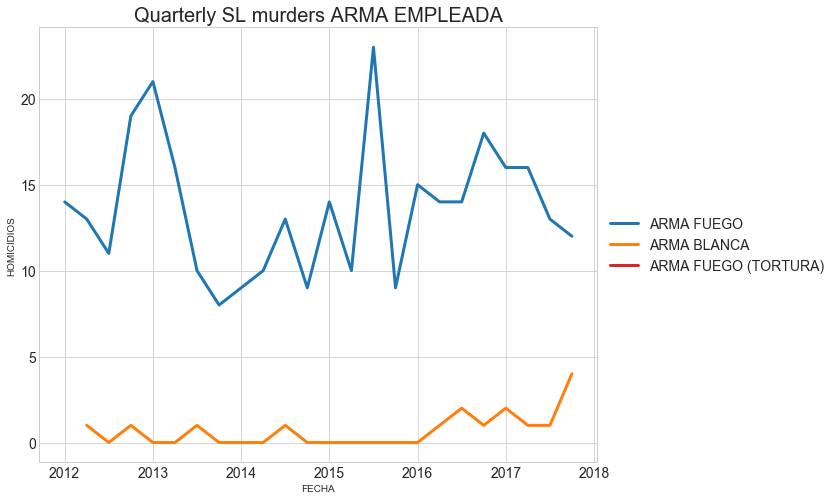

In [37]:
armacolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(10,8))
plt.title('Yearly SL murders ARMA EMPLEADA',fontsize=20)
lgd = plot_ts_cat(colname='ARMA EMPLEADA',resampleby='A',thresh= 1.0,custom_colors = armacolors)
tmpdata = plot_ts_cat_data(colname='ARMA EMPLEADA',resampleby='A',thresh= 1.0,custom_colors = armacolors)
tmpdata.to_csv('PlotData/time_arma_year.csv')
plt.tick_params(labelsize=14)
plt.ylabel('HOMICIDIOS')
plt.savefig('ImagesPaper/time_arma_year.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

#plt.figure(figsize=(22,10))
plt.figure(figsize=(10,8))
plt.title('Quarterly SL murders ARMA EMPLEADA',fontsize=20)
lgd = plot_ts_cat(colname='ARMA EMPLEADA',resampleby='Q',thresh= 1.0,custom_colors = [armacolors[0],armacolors[1],armacolors[3]])
tmpdata = plot_ts_cat_data(colname='ARMA EMPLEADA',resampleby='Q',thresh= 1.0,custom_colors = [armacolors[0],armacolors[1],armacolors[3]])
tmpdata.to_csv('PlotData/time_arma_quart.csv')
plt.tick_params(labelsize=14)
plt.ylabel('HOMICIDIOS')
plt.savefig('ImagesPaper/time_arma_quart.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

In [39]:
data_all[u'ARMA EMPLEADA'].value_counts()

ARMA FUEGO                      59643
ARMA BLANCA                     16663
CONTUNDENTES                     2601
EXPLOSIVO                         621
CUERDA/SOGA/CADENA                316
BOLSA PLASTICA                    129
REPORTADO                          87
GASOLINA                           44
SIN EMPLEO ARMAS                   36
VENENO                             27
CINTAS/CINTURON                    27
ALMOHADA                           27
SUSTANCIAS TOXICAS                 15
COMBUSTIBLE                        15
ARTEFACTO INCENDIARIO               9
CINTAS                              8
PRENDAS VESTIR                      4
ACIDO                               4
QUIMICOS                            3
ESCOPOLAMINA                        2
JERINGA                             1
LIQUIDOS                            1
GASES                               1
ROCKET                              1
MEDICAMENTOS                        1
POLVORA(FUEGOS PIROTECNICOS)        1
Name: ARMA E

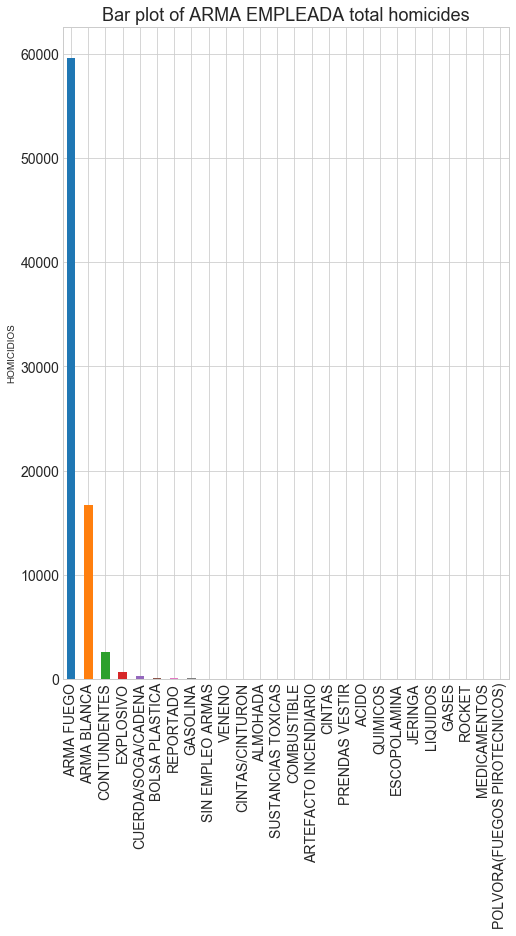

In [40]:
counts = data_all[u'ARMA EMPLEADA'].value_counts()
plt.figure(figsize=(8,12))
counts.plot(kind='bar')
counts.to_csv('PlotData/bar_arma_total.csv')

plt.title('Bar plot of ARMA EMPLEADA total homicides',fontsize=18)
plt.tick_params(labelsize=14)
plt.ylabel('HOMICIDIOS')
plt.savefig('Images/bar_arma_total.jpg')
plt.show()

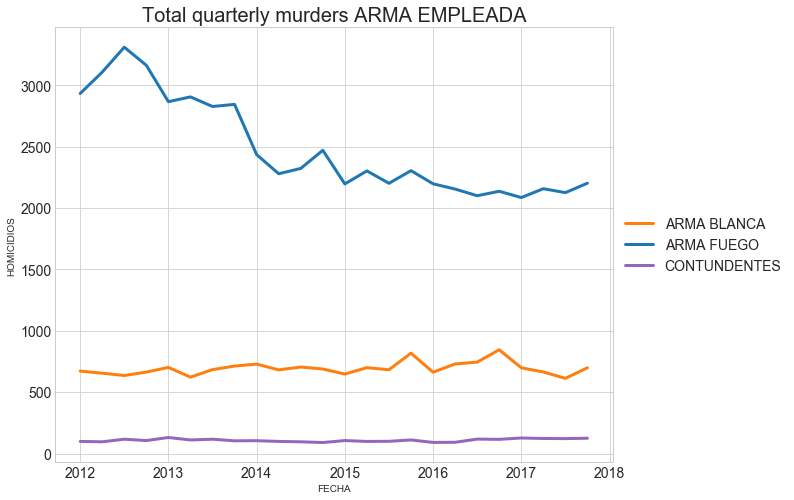

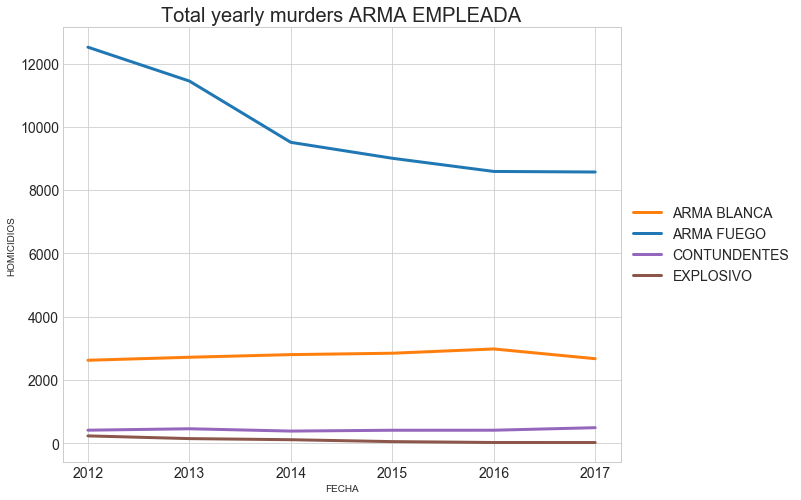

In [69]:
plt.figure(figsize=(10,8))
plt.title('Total quarterly murders ARMA EMPLEADA' ,fontsize=20)
lgd = plot_ts_cat(colname='ARMA EMPLEADA',resampleby='Q',thresh= 100.0, dataset="all",custom_colors=[armacolors[1],armacolors[0],armacolors[4]])
tmpdata = plot_ts_cat_data(colname='ARMA EMPLEADA',resampleby='Q',thresh= 100.0, dataset="all",custom_colors=[armacolors[1],armacolors[0],armacolors[4]])
tmpdata.to_csv('PlotData/time_arma_all_quart.csv')
plt.tick_params(labelsize=14)
plt.ylabel('HOMICIDIOS')
plt.savefig('Images/time_arma_all_quart.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.figure(figsize=(10,8))
plt.title('Total yearly murders ARMA EMPLEADA',fontsize=20)
lgd = plot_ts_cat(colname='ARMA EMPLEADA',resampleby='A',thresh= 100.0, dataset="all",custom_colors=[armacolors[1],armacolors[0],armacolors[4],armacolors[5]])
tmpdata= plot_ts_cat_data(colname='ARMA EMPLEADA',resampleby='A',thresh= 100.0, dataset="all",custom_colors=[armacolors[1],armacolors[0],armacolors[4],armacolors[5]])
tmpdata.to_csv('PlotData/time_arma_all_year.csv')
plt.tick_params(labelsize=14)
plt.ylabel('HOMICIDIOS')
plt.savefig('Images/time_arma_all_year.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

## DEPARTAMENTO

7.¿Cuáles son los departamentos y municipios de Colombia dónde es más peligroso ser líder social, teniendo como partida de este supuesto, el número de homicidios reportado por la Fiscalía Nacional)


### Plot y numeros

In [98]:
sl_counts = data_social[u'DEPARTAMENTO'].value_counts().to_dict()
all_counts = data_all[u'DEPARTAMENTO'].value_counts().to_dict()


In [107]:
sl_counts

{'CAUCA': 62,
 'ANTIOQUIA': 57,
 'VALLE DEL CAUCA': 32,
 'CUNDINAMARCA': 22,
 'CORDOBA': 18,
 'NARINO': 18,
 'NORTE DE SANTANDER': 18,
 'RISARALDA': 17,
 'PUTUMAYO': 13,
 'CHOCO': 12,
 'META': 10,
 'ATLANTICO': 9,
 'ARAUCA': 8,
 'CALDAS': 8,
 'CAQUETA': 8,
 'HUILA': 7,
 'CESAR': 6,
 'MAGDALENA': 6,
 'CASANARE': 5,
 'BOLIVAR': 5,
 'LA GUAJIRA': 4,
 'SUCRE': 4,
 'SANTANDER': 3,
 'TOLIMA': 3,
 'BOGOTA D.C.': 1,
 'GUAVIARE': 1,
 'BOYACA': 1}

In [101]:
for key,value in sl_counts.items():
    if key == 'LA GUAJIRA':
        continue
    if key in all_counts:
        all_counts[key]=(all_counts[key],value)
    else:
        all_counts[key]=(all_counts[key],0)
        

KeyError: 'BOGOTA D.C.'

In [106]:
data_all[data_all.MUNICIPIO.str.contains('BOGOTA')]

,ARMA EMPLEADA,BARRIO,BARRIOS,CLASE EMPLEADO,CLASE SITIO,CODIGO DANE,DEPARTAMENTO,DIA,EDAD,ESCOLARIDAD,...,GENERO,HORA,MOVIL AGRESOR,MOVIL VICTIMA,MUNICIPIO,PAIS NACE,PROFESIONES,SEXO,ZONA,Deaths
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,ARMA BLANCA,LA AURORA I SECTOR E-5,NaN,INDEPENDIENTE,VIAS PUBLICAS,11001000.0,CUNDINAMARCA,Domingo,29,SECUNDARIA,...,NaN,1:40,A PIE,A PIE,BOGOTA D.C. (CT),COLOMBIA,NO REPORTADO,MASCULINO,URBANA,1.0
2012-01-01,ARMA FUEGO,ISLA DEL SOL E-6,NaN,INDEPENDIENTE,VIAS PUBLICAS,11001000.0,CUNDINAMARCA,Domingo,48,SECUNDARIA,...,NaN,3:00,A PIE,A PIE,BOGOTA D.C. (CT),COLOMBIA,NO REPORTADO,MASCULINO,URBANA,1.0
2012-01-01,ARMA BLANCA,DANUBIO AZUL E-5,NaN,INDEPENDIENTE,VIAS PUBLICAS,11001000.0,CUNDINAMARCA,Domingo,40,SECUNDARIA,...,NaN,4:00,A PIE,A PIE,BOGOTA D.C. (CT),COLOMBIA,NO REPORTADO,MASCULINO,URBANA,1.0
2012-01-01,ARMA BLANCA,BARRANQUILLITA E-5,NaN,INDEPENDIENTE,VIAS PUBLICAS,11001000.0,CUNDINAMARCA,Domingo,49,SECUNDARIA,...,NaN,5:24,A PIE,A PIE,BOGOTA D.C. (CT),COLOMBIA,NO REPORTADO,MASCULINO,URBANA,1.0
2012-01-01,ARMA BLANCA,BRASILIA I SECTOR E-7,NaN,INDEPENDIENTE,VIAS PUBLICAS,11001000.0,CUNDINAMARCA,Domingo,21,SECUNDARIA,...,NaN,6:02,A PIE,A PIE,BOGOTA D.C. (CT),COLOMBIA,NO REPORTADO,MASCULINO,URBANA,1.0
2012-01-01,ARMA FUEGO,DIANA TURBAY E-18,NaN,INDEPENDIENTE,VIAS PUBLICAS,11001000.0,CUNDINAMARCA,Domingo,16,PRIMARIA,...,NaN,8:41,A PIE,A PIE,BOGOTA D.C. (CT),COLOMBIA,NO REPORTADO,FEMENINO,URBANA,1.0
2012-01-01,ARMA FUEGO,PATIO BONITO I E-8,NaN,INDEPENDIENTE,CICLO RUTA,11001000.0,CUNDINAMARCA,Domingo,42,SECUNDARIA,...,NaN,14:53,A PIE,A PIE,BOGOTA D.C. (CT),COLOMBIA,NO REPORTADO,MASCULINO,URBANA,1.0
2012-01-01,ARMA BLANCA,PALERMO SUR E-18,NaN,EMPLEADO PARTICULAR,VIAS PUBLICAS,11001000.0,CUNDINAMARCA,Domingo,23,PRIMARIA,...,NaN,15:00,A PIE,A PIE,BOGOTA D.C. (CT),COLOMBIA,NO REPORTADO,MASCULINO,URBANA,1.0
2012-01-01,ARMA BLANCA,EL PARAASO E-19,NaN,INDEPENDIENTE,VIAS PUBLICAS,11001000.0,CUNDINAMARCA,Domingo,26,PRIMARIA,...,NaN,16:30,A PIE,A PIE,BOGOTA D.C. (CT),COLOMBIA,NO REPORTADO,MASCULINO,URBANA,1.0


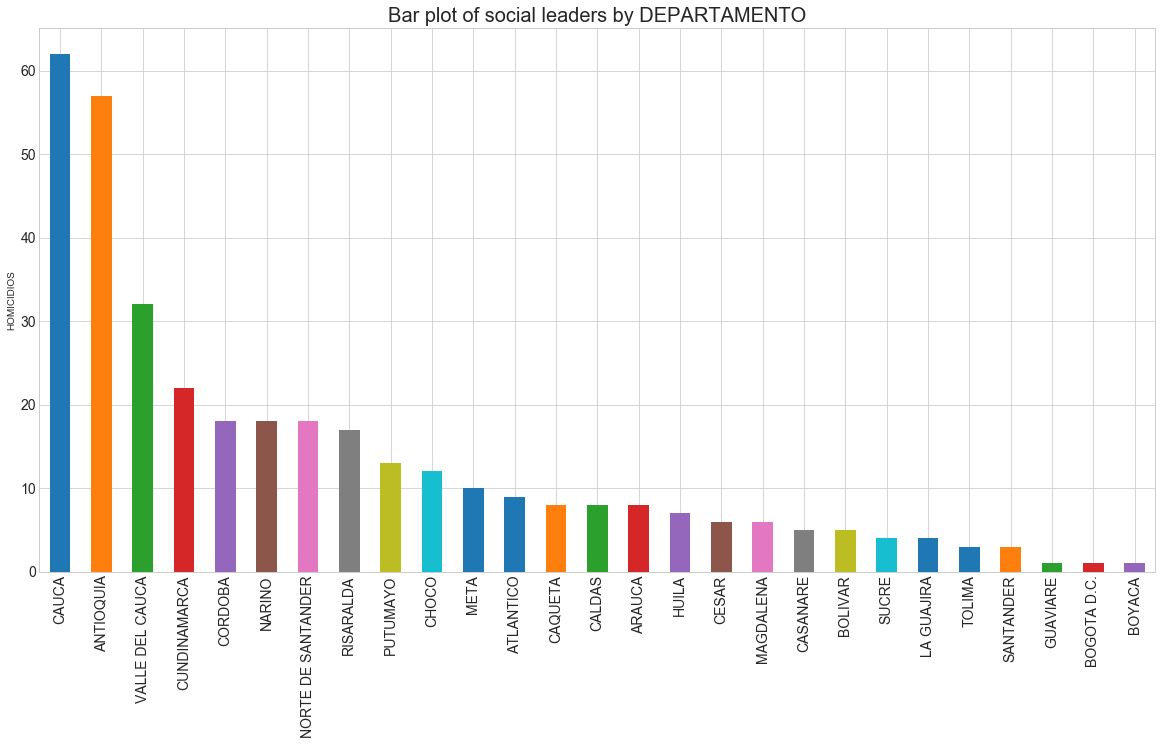

CAUCA                 62
ANTIOQUIA             57
VALLE DEL CAUCA       32
CUNDINAMARCA          22
CORDOBA               18
NARINO                18
NORTE DE SANTANDER    18
RISARALDA             17
PUTUMAYO              13
CHOCO                 12
META                  10
ATLANTICO              9
CAQUETA                8
CALDAS                 8
ARAUCA                 8
HUILA                  7
CESAR                  6
MAGDALENA              6
CASANARE               5
BOLIVAR                5
SUCRE                  4
LA GUAJIRA             4
TOLIMA                 3
SANTANDER              3
GUAVIARE               1
BOGOTA D.C.            1
BOYACA                 1
Name: DEPARTAMENTO, dtype: int64


In [70]:
plt.figure(figsize=(20,10))
counts = data_social[u'DEPARTAMENTO'].value_counts()
counts.plot(kind='bar')
counts.to_csv('PlotData/bar_depto.csv')
plt.title('Bar plot of social leaders by DEPARTAMENTO',fontsize=20)
plt.tick_params(labelsize=14)
plt.ylabel('HOMICIDIOS')
plt.savefig('ImagesPaper/bar_depto.jpg')
plt.show()
print(counts)

## FECHAS
10.¿Cuáles son los años desde 2012 con mayor incidencia de asesinatos de líderes sociales?

### evolucion de anyo, quarto, y mes:

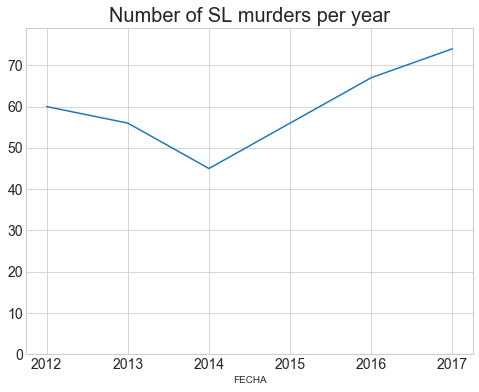

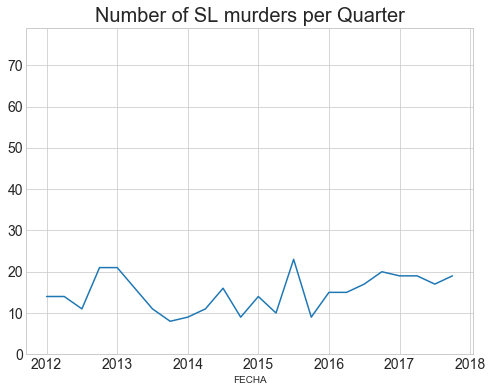

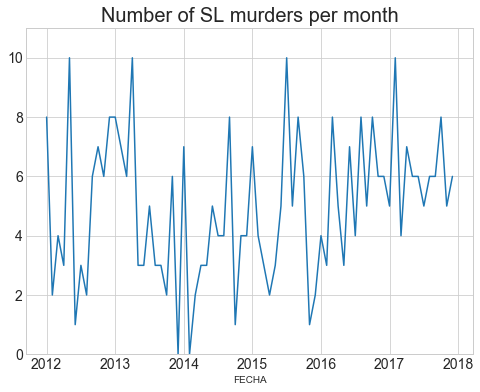

In [71]:
peryear = data_social['Deaths'].resample('A').sum()
plt.figure(figsize=(8,6))
peryear.plot()
peryear.to_csv('PlotData/time_year_sl.csv')
plt.title('Number of SL murders per year',fontsize=20)
plt.ylim((0,max(peryear)+5))
plt.tick_params(labelsize=14)
plt.savefig('Images/time_year_sl.jpg')
plt.show()

perquarter = data_social['Deaths'].resample('Q').sum()
plt.figure(figsize=(8,6))
perquarter.plot()
perquarter.to_csv('PlotData/time_quart_sl.csv')
plt.title('Number of SL murders per Quarter',fontsize=20)
plt.ylim((0,max(peryear)+5))
plt.tick_params(labelsize=14)
plt.savefig('Images/time_quart_sl.jpg')
plt.show()



permonth = data_social['Deaths'].resample('M').sum()
plt.figure(figsize=(8,6))
permonth.plot()
permonth.to_csv('PlotData/time_month_sl.csv')
plt.title('Number of SL murders per month',fontsize=20)
plt.ylim((0,max(permonth)+1))
plt.tick_params(labelsize=14)
plt.savefig('Images/time_month_sl.jpg')
plt.show()

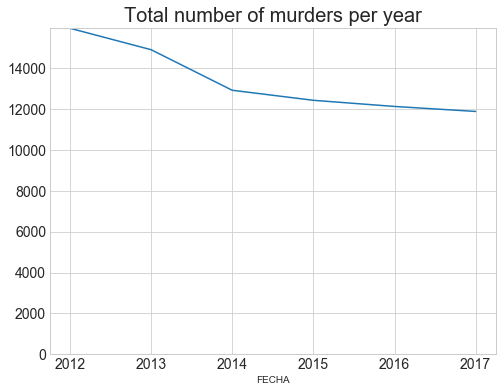

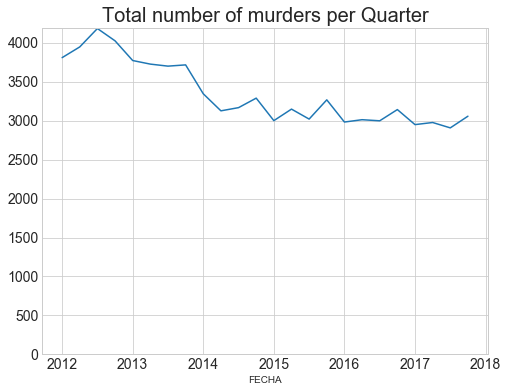

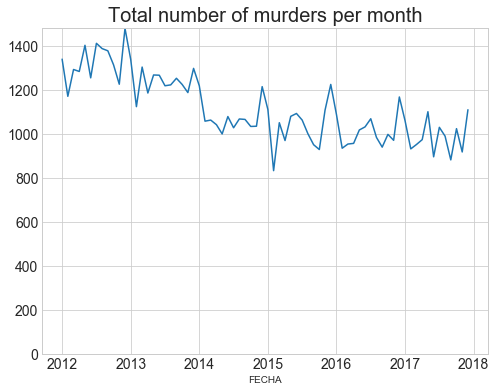

In [72]:

peryear = data_all['Deaths'].resample('A').sum()
plt.figure(figsize=(8,6))
peryear.plot()
peryear.to_csv('PlotData/time_year_all.csv')

plt.title('Total number of murders per year',fontsize=20)
plt.ylim((0,max(peryear)+5))
plt.tick_params(labelsize=14)
plt.savefig('Images/time_year_all.jpg')
plt.show()

peryear = data_all['Deaths'].resample('Q').sum()
plt.figure(figsize=(8,6))
peryear.plot()
peryear.to_csv('PlotData/time_quart_all.csv')
plt.title('Total number of murders per Quarter',fontsize=20)
plt.ylim((0,max(peryear)+5))
plt.tick_params(labelsize=14)
plt.savefig('Images/time_quart_all.jpg')
plt.show()



permonth = data_all['Deaths'].resample('M').sum()
plt.figure(figsize=(8,6))
permonth.plot()
permonth.to_csv('PlotData/time_month_all.csv')
plt.title('Total number of murders per month',fontsize=20)
plt.ylim((0,max(permonth)+1))
plt.tick_params(labelsize=14)
plt.savefig('Images/time_month_all.jpg')
plt.show()

# Social leaders and all murders with twin y axes

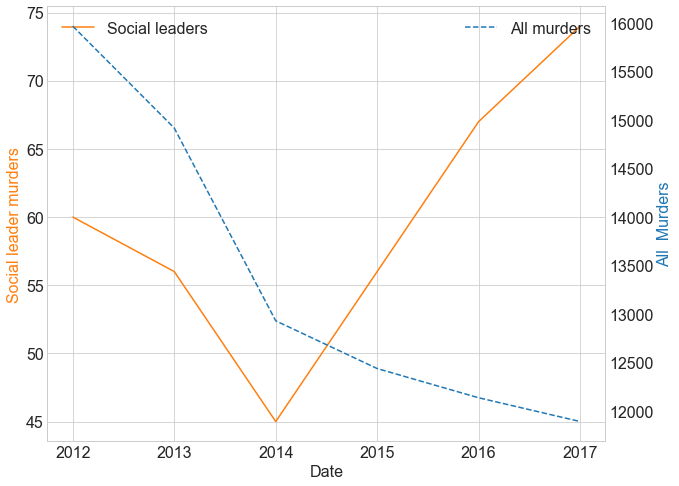

In [48]:
newdf = pd.concat([data_social['Deaths'].resample('A').sum(), data_all['Deaths'].resample('A').sum()],axis=1)
newdf.columns = ['social leaders','all murders']
fig, ax1 = plt.subplots(figsize=(10,8))

ax2 = ax1.twinx()

newdf['all murders'].plot(ax=ax2,color=COLORCYCLE[0],style='--',label = 'All murders')
newdf['social leaders'].plot(ax=ax1,color=COLORCYCLE[1],style='-',label = 'Social leaders')#style='r-'

ax1.set_xlabel('Date')
ax1.set_ylabel('Social leader murders', color=COLORCYCLE[1])
ax2.set_ylabel('All  Murders', color=COLORCYCLE[0])
ax2.legend(loc=0)
ax1.legend()
plt.grid()
plt.savefig('ImagesPaper/Social_vs_all_twin.png')
plt.show()

In [135]:
newdf = pd.concat([data_social['Deaths'].resample('Q').sum(), data_all['Deaths'].resample('Q').sum()],axis=1)
newdf.columns = ['social leaders','all murders']

In [136]:
pvalues = [np.nan]
for it in range(newdf.shape[0]-1):
    oddsratio, pvalue = stats.fisher_exact(np.array([newdf.values[:it+1].sum(0),
    newdf.values[it+1:].sum(0)]))
    pvalues.append(pvalue)
newdf['pval'] = pvalues

In [51]:
# FDR correction
from statsmodels.stats.multitest import fdrcorrection
#fdrcorrection(pvalues, alpha=0.05, method='indep', is_sorted=False)

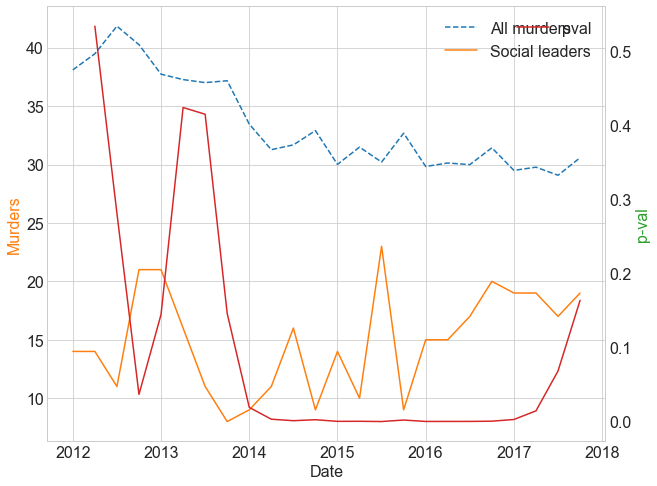

In [144]:
fig, ax1 = plt.subplots(figsize=(10,8))

ax2 = ax1.twinx()

(newdf['all murders']/100.0).plot(ax=ax1,color=COLORCYCLE[0],style='--',label = 'All murders')
newdf['social leaders'].plot(ax=ax1,color=COLORCYCLE[1],style='-',label = 'Social leaders')#style='r-'
newdf['pval'].plot(ax=ax2,color=COLORCYCLE[3],style='-',label = 'pval')#style='r-'


ax1.set_xlabel('Date')
ax1.set_ylabel('Murders', color=COLORCYCLE[1])
ax2.set_ylabel('p-val', color=COLORCYCLE[2])
ax2.legend(loc=1)
ax1.legend(loc=0)
plt.grid()
#plt.savefig('ImagesPaper/Social_vs_all_twin.png')
plt.show()

# Homicidios por departamento, anyo y quarto

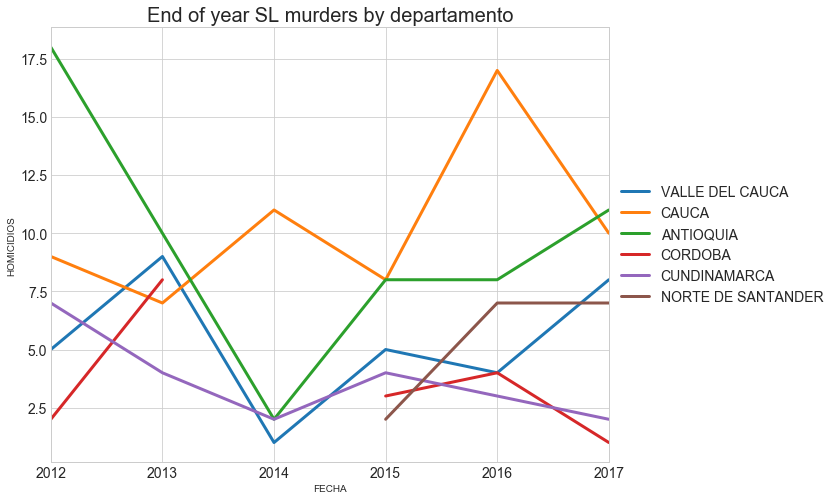

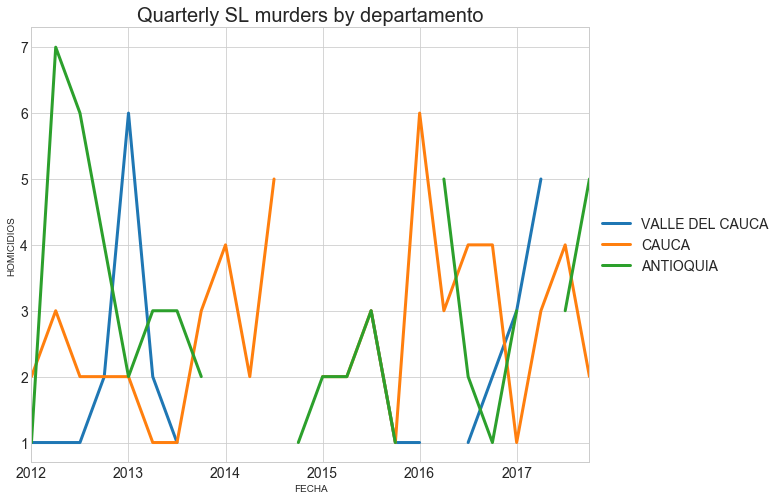

In [12]:
deptcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(10,8))
plt.title('End of year SL murders by departamento',fontsize=20)
lgd = plot_ts_cat(resampleby='A',thresh= 4.0,custom_colors=deptcolors)
tmpdata = plot_ts_cat_data(resampleby='A',thresh= 4.0,custom_colors=deptcolors)
tmpdata.to_csv('PlotData/time_depto_year.csv')
plt.tick_params(labelsize=14)
plt.ylabel('HOMICIDIOS')
plt.savefig('Images/time_depto_year.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


plt.figure(figsize=(10,8))
plt.title('Quarterly SL murders by departamento',fontsize=20)
lgd = plot_ts_cat(resampleby='Q',thresh= 4.0,custom_colors=deptcolors)
tmpdata = plot_ts_cat_data(resampleby='Q',thresh= 4.0,custom_colors=deptcolors)
tmpdata.to_csv('PlotData/time_depto_quarter.csv')
plt.ylabel('HOMICIDIOS')
plt.tick_params(labelsize=14)
plt.savefig('Images/time_depto_quarter.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

# WARNING: DEPARTAMENTO for official homicides data not cleaned. 

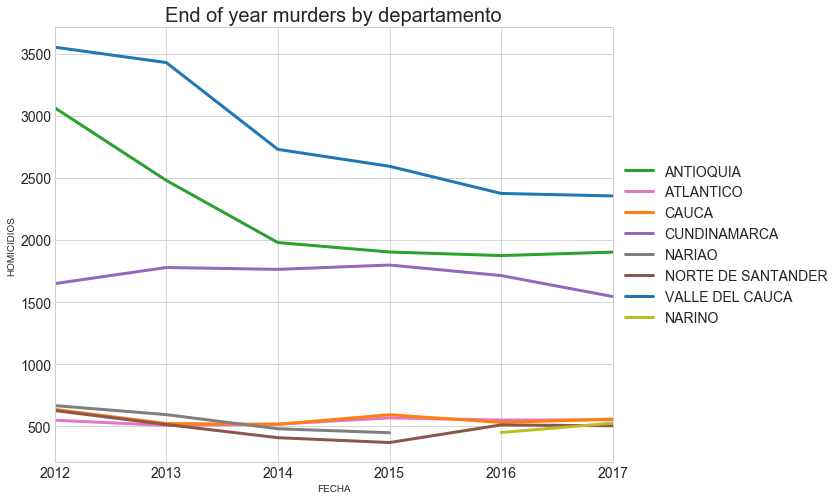

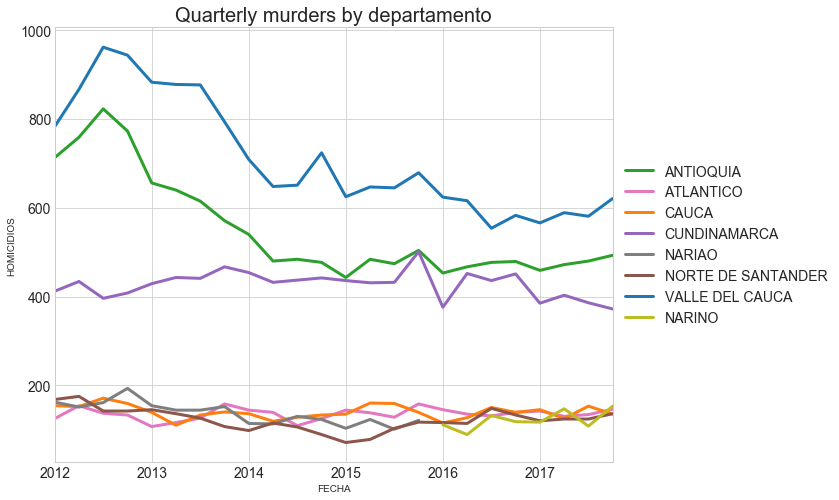

In [13]:
dptc = np.array(deptcolors)
deptcolors2 = np.take(dptc,[2,6,1,4,7,5,0,8]).tolist()
plt.figure(figsize=(10,8))
plt.title('End of year murders by departamento',fontsize=20)
lgd = plot_ts_cat(resampleby='A',thresh= 500.0,dataset='all',custom_colors=deptcolors2)
tmpdf = plot_ts_cat_data(resampleby='A',thresh= 500.0,dataset='all',custom_colors=deptcolors2)
tmpdf.to_csv('PlotData/time_depto_all_year.csv')

plt.tick_params(labelsize=14)
plt.ylabel('HOMICIDIOS')
plt.savefig('Images/time_depto_all_year.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,8))
plt.title('Quarterly murders by departamento',fontsize=20)
lgd = plot_ts_cat(resampleby='Q',thresh= 150.0,dataset='all',custom_colors=deptcolors2)
tmpdf = plot_ts_cat_data(resampleby='Q',thresh= 150.0,dataset='all',custom_colors=deptcolors2)
tmpdf.to_csv('PlotData/time_depto_all_quarter.csv')
plt.tick_params(labelsize=14)
plt.ylabel('HOMICIDIOS')
plt.savefig('Images/time_depto_all_quarter.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

# Homicidios por sexo

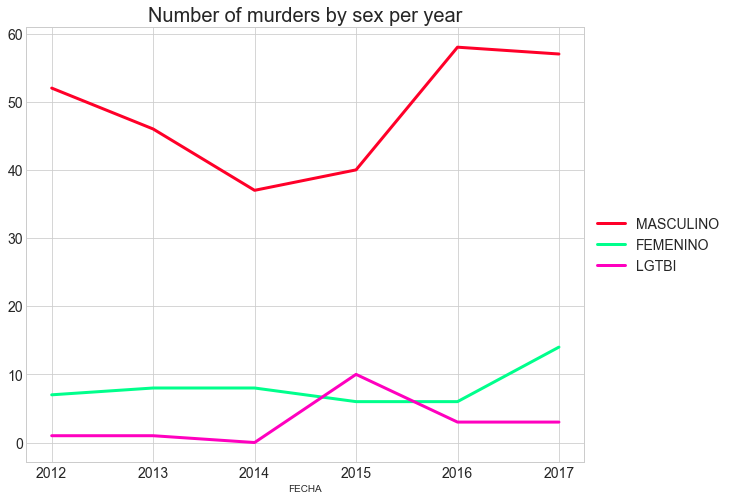

In [89]:
plt.figure(figsize=(10,8))
plt.title('Number of murders by sex per year',fontsize=20)
plot_ts_cat(colname=u'SEXO',resampleby='A',thresh= 1.0)
#tmpdf = plot_ts_cat_data(colname=u'SEXO',resampleby='A',thresh= 1.0)
#tmpdf.to_csv('PlotData/tmp.csv')
plt.tick_params(labelsize=14)

# Homicidios por genero, femenino y LGTBI por mes

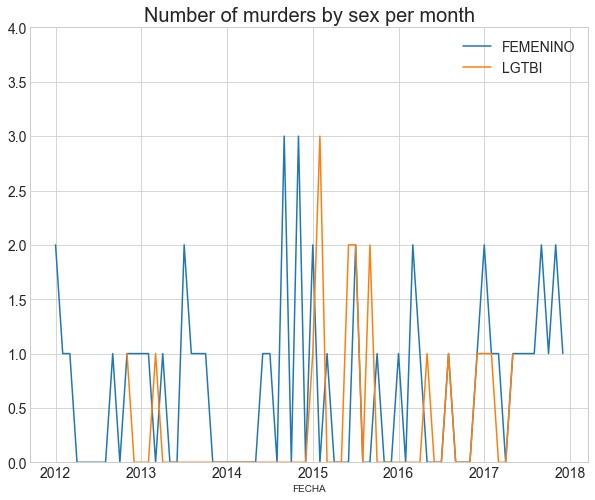

In [90]:
plt.figure(figsize=(10,8))
permonth = data_social[data_social.SEXO=='FEMENINO']['Deaths'].resample('M').sum()
permonth.plot(label='FEMENINO',legend=True,)
permonth = data_social[data_social.SEXO=='LGTBI']['Deaths'].resample('M').sum()
permonth.plot(label='LGTBI',legend=True,)
plt.title('Number of murders by sex per month',fontsize=20)
plt.ylim((0,max(permonth)+1))
plt.tick_params(labelsize=14)
plt.legend(fontsize=14)
plt.show()

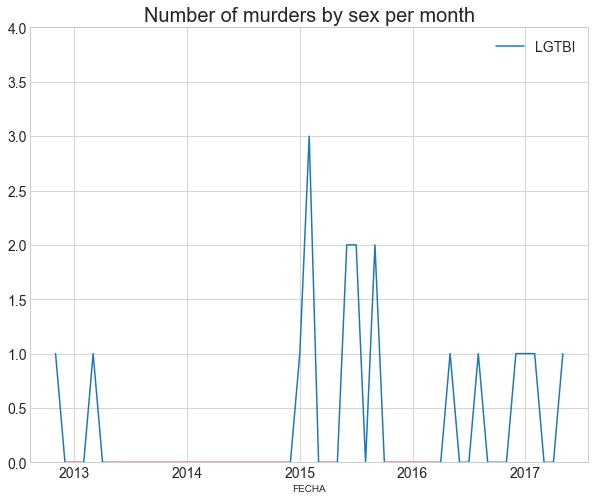

In [91]:
plt.figure(figsize=(10,8))
permonth = data_social[data_social.SEXO=='LGTBI']['Deaths'].resample('M').sum()
permonth.plot(label='LGTBI',legend=True)
plt.title('Number of murders by sex per month',fontsize=20)
plt.ylim((0,max(permonth)+1))
plt.tick_params(labelsize=14)
plt.legend(fontsize=14)
plt.show()

# NOMBRE DE LA ORGANIZACIÓN
11.¿Cuáles son las organizaciones sociales que han puesto más víctimas entre 2012 y 2017 en todo el territorio colombiano?

In [75]:
data_social[u'NOMBRE DE LA ORGANIZACION'].value_counts()

COMUNIDAD EMBERA CHAMI                                         4
NASA                                                           3
SINDICATO AGUAS DE BOGOTA                                      3
RESGUARDO DE PURACE                                            3
RESGUARDO EMBERA CHAMI                                         2
ASOCOMUNAL                                                     2
CONSEJO COMUNITARIO ALTO MIRA                                  2
JAC SAN SALVADOR                                               2
RIOS VIVOS ANTIOQUIA                                           2
JAC BETANIA                                                    2
JAC LAS PALMERAS                                               2
ANUC                                                           2
JAC EL CAUCE                                                   2
JAC EL DESCANSO                                                2
JAC LA CIPRA                                                   2
CONGRESO DE LOS PUEBLOS  

## SITUACION JURIDICA IMPUTADOS

8.¿Cuántas personas han sido capturadas por estar relacionadas con el homicidio de líderes sociales en Colombia entre 2011 y 2017?

#### necesita limpieza

In [93]:
counts = data_social[u'SITUACION JURIDICA IMPUTADOS'].value_counts()
counts

MEDIDA SE ASEGURAMIENTO INTRAMURAL                                                                                                                                                                                                                                                                                                      12
SENTENCIA CONDENATORIA                                                                                                                                                                                                                                                                                                                  10
MEDIDA DE ASEGURAMIENTO INTRAMURAL                                                                                                                                                                                                                                                                                                       9
MEDIDA 

## INDICIADOS O IMPUTADOS

9.¿Cuántos de los casos que lleva la Fiscalía tienen culpables y cuántos están en situación de indagación?

#### necesita limpieza

In [94]:
data_social[u'INDICIADOS O IMPUTADOS'].value_counts()

AVERIGUACION RESPONSABLES                                                                                                                                                                                                                                                                                                                                                                                                                                                      184
AVERIGUACION RESPONSABLES                                                                                                                                                                                                                                                                                                                                                                                                                                                       38
EN AVERIGUACION RESPOINSABLES                                     

In [ ]:
data_social

# Alternative Definitions

In [25]:
searchlistalt = ['JAC,','JAC.','JAC ','JUNTA DE ACCION COMUNAL','CONSEJO COMUNITARIO','JAL ']
data_social['ALT ORG COMUNAL/COMUNITARIO']=0
data_social.loc[data_social['NOMBRE DE LA ORGANIZACION'].str.contains('|'.join(searchlistalt))==True,'ALT ORG COMUNAL/COMUNITARIO']=1
data_social.loc[data_social['ORGANIZACION A LA QUE PERTENECE'].str.contains('|'.join(searchlistalt))==True,'ALT ORG COMUNAL/COMUNITARIO']=1

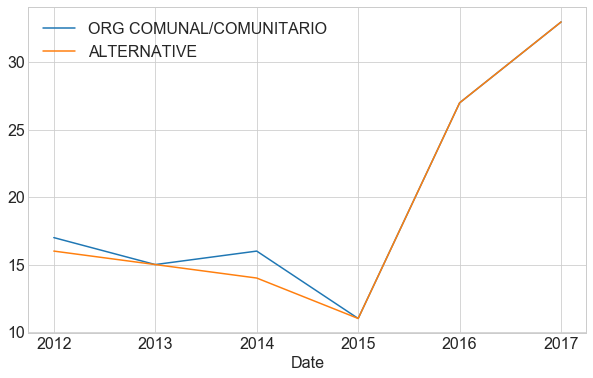

In [28]:
plt.figure(figsize=(10,6))
data_social[data_social['ORG COMUNAL/COMUNITARIO']==1]['Deaths'].resample('A').sum().plot(label='ORG COMUNAL/COMUNITARIO')
data_social[data_social['ALT ORG COMUNAL/COMUNITARIO']==1]['Deaths'].resample('A').sum().plot(label='ALTERNATIVE')
plt.legend()
plt.show()

# Dump

In [11]:
data_social.to_csv('Datos/subsets/social_leaders_cleaned.csv',index=False)

In [77]:
data_social[data_social['JAC']==1].to_csv('Datos/subsets/social_leaders_JAC.csv',index=False)
data_social[data_social['ORG COMUNAL/COMUNITARIO']==1].to_csv('Datos/subsets/social_leaders_ORG_COMUNAL.csv',index=False)

In [78]:
df_tmp = data_social['2017-1-1':]
df_tmp[df_tmp.DEPARTAMENTO=='NORTE DE SANTANDER'].to_csv('Datos/subsets/social_leaders_NORTE_SANTANDER2017.csv',index=False)

In [24]:
data_social[data_social.MUNICIPIO=='FORTUL'].to_csv('Datos/subsets/social_leaders_FORTUL.csv',index=False)

## plot overall trends

In [80]:
data_social[data_social['JAC']==1].Deaths.resample('Q').sum()

FECHA
2012-03-31     2.0
2012-06-30     4.0
2012-09-30     3.0
2012-12-31     5.0
2013-03-31     5.0
2013-06-30     2.0
2013-09-30     4.0
2013-12-31     1.0
2014-03-31     1.0
2014-06-30     3.0
2014-09-30     3.0
2014-12-31     5.0
2015-03-31     4.0
2015-06-30     0.0
2015-09-30     4.0
2015-12-31     0.0
2016-03-31     2.0
2016-06-30     3.0
2016-09-30     6.0
2016-12-31     3.0
2017-03-31     7.0
2017-06-30     6.0
2017-09-30     2.0
2017-12-31    10.0
Freq: Q-DEC, Name: Deaths, dtype: float64

In [82]:
df1 = data_social[data_social['JAC']==1].Deaths.resample('Q').sum()

df1.name='JAC'
df2 = data_social[data_social['JAC']==0].Deaths.resample('Q').sum()

df2.name='Otra'
tmpdf = pd.concat([df1,df2],axis=1)

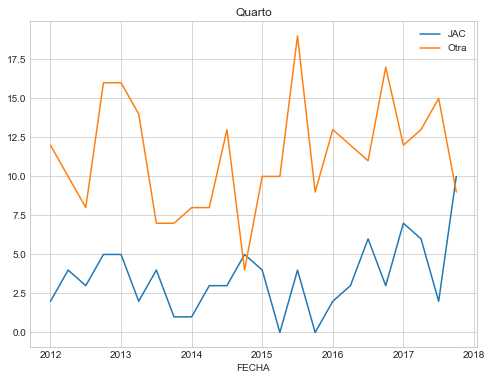

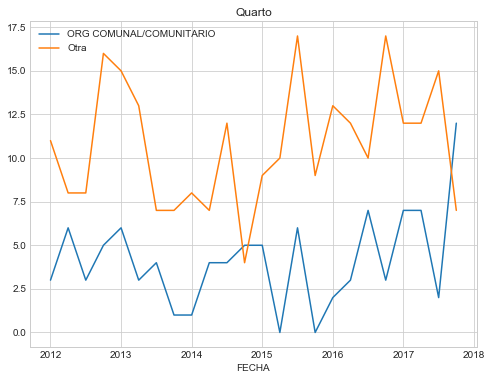

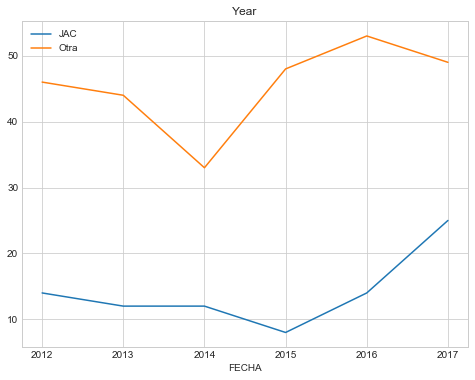

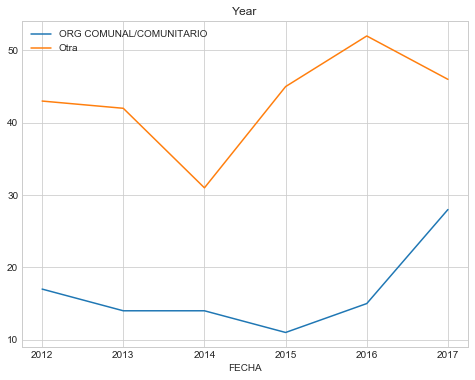

In [84]:
plt.figure(figsize=(8,6))
df1 = data_social[data_social['JAC']==1].Deaths.resample('Q').sum()
df1.plot(label='JAC')
df1.name='JAC'
df2 = data_social[data_social['JAC']==0].Deaths.resample('Q').sum()
df2.plot(label='Otra')
df2.name='Otra'
tmpdf = pd.concat([df1,df2],axis=1)
tmpdf.to_csv('PlotData/JAC_OTRA_quarto.csv')
plt.title('Quarto')
lgd = plt.legend()
plt.savefig('Images/JAC_OTRA_quarto.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
#plt.savefig('Images/ORG_COMUN_quarto.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.figure(figsize=(8,6))
df1 = data_social[data_social['ORG COMUNAL/COMUNITARIO']==1].Deaths.resample('Q').sum()
df1.plot(label='ORG COMUNAL/COMUNITARIO')
df1.name = 'ORG COMUNAL/COMUNITARIO'
df2 = data_social[data_social['ORG COMUNAL/COMUNITARIO']==0].Deaths.resample('Q').sum()
df2.plot(label='Otra')
df2.name = 'Otra'
tmpdf = pd.concat([df1,df2],axis=1)
tmpdf.to_csv('PlotData/ORG_COMUNAL_OTRA_quarto.csv')

plt.title('Quarto')
lgd = plt.legend()
plt.savefig('Images/ORG_COMUNAL_OTRA_quarto.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


plt.figure(figsize=(8,6))
df1 = data_social[data_social['JAC']==1].Deaths.resample('A').sum()
df1.plot(label='JAC')
df1.name='JAC'
df2 = data_social[data_social['JAC']==0].Deaths.resample('A').sum()
df2.plot(label='Otra')
df2.name='Otra'
tmpdf = pd.concat([df1,df2],axis=1)
tmpdf.to_csv('PlotData/JAC_OTRA_year.csv')

plt.title('Year')
lgd = plt.legend()
plt.savefig('Images/JAC_OTRA_year.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
#plt.savefig('Images/ORG_COMUN_quarto.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.figure(figsize=(8,6))
df1 = data_social[data_social['ORG COMUNAL/COMUNITARIO']==1].Deaths.resample('A').sum()
df1.plot(label='ORG COMUNAL/COMUNITARIO')
df1.name = 'ORG COMUNAL/COMUNITARIO'

df2 = data_social[data_social['ORG COMUNAL/COMUNITARIO']==0].Deaths.resample('A').sum()
df2.plot(label='Otra')
df2.name = 'Otra'
tmpdf = pd.concat([df1,df2],axis=1)
tmpdf.to_csv('PlotData/ORG_COMUNAL_OTRA_year.csv')
plt.title('Year')
lgd = plt.legend()
plt.savefig('Images/ORG_COMUNAL_OTRA_year.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## by departamento

### comunal general

In [33]:
# TOTAL
data_social.loc[data_social[u'TIPO DE ORGANIZACION']=='COMUNAL'].DEPARTAMENTO.value_counts()

ANTIOQUIA             21
CUNDINAMARCA          13
CAUCA                 11
VALLE DEL CAUCA       10
RISARALDA             10
NORTE DE SANTANDER    10
META                   7
PUTUMAYO               7
ARAUCA                 6
CORDOBA                6
NARINO                 5
CASANARE               5
CAQUETA                4
HUILA                  4
ATLANTICO              3
SANTANDER              3
BOLIVAR                2
CHOCO                  2
CESAR                  2
GUAVIARE               1
MAGDALENA              1
BOYACA                 1
BOGOTA D.C.            1
CALDAS                 1
Name: DEPARTAMENTO, dtype: int64

In [85]:
# killings in 2016 and 2017 of comunal
print data_social.loc[((data_social.Date.dt.year == 2016) | (data_social.Date.dt.year == 2017)) & (data_social[u'TIPO DE ORGANIZACION']=='COMUNAL')].DEPARTAMENTO.value_counts()

print '_'*50
# killings in 2016 and 2017 of ORG Comunal / Jac
data_social.loc[((data_social.Date.dt.year == 2016) | (data_social.Date.dt.year == 2017)) & (data_social['ORG COMUNAL/COMUNITARIO']==1)].DEPARTAMENTO.value_counts()

NORTE DE SANTANDER    10
ANTIOQUIA              8
VALLE DEL CAUCA        7
CAUCA                  7
RISARALDA              6
CORDOBA                4
NARINO                 3
PUTUMAYO               3
CASANARE               3
CUNDINAMARCA           3
CHOCO                  2
CESAR                  2
HUILA                  2
META                   2
CAQUETA                2
GUAVIARE               1
ATLANTICO              1
SANTANDER              1
CALDAS                 1
ARAUCA                 1
BOLIVAR                1
Name: DEPARTAMENTO, dtype: int64
__________________________________________________


CAUCA                 6
NORTE DE SANTANDER    6
RISARALDA             5
ANTIOQUIA             4
CORDOBA               3
NARINO                3
CASANARE              2
PUTUMAYO              2
CAQUETA               2
META                  2
ATLANTICO             1
BOLIVAR               1
SUCRE                 1
ARAUCA                1
CHOCO                 1
GUAVIARE              1
VALLE DEL CAUCA       1
CUNDINAMARCA          1
Name: DEPARTAMENTO, dtype: int64

In [94]:
# killings in 2016 and 2017 of comunal
print data_social.loc[((data_social.Date.dt.year == 2016) | (data_social.Date.dt.year == 2017)) & (data_social[u'TIPO DE ORGANIZACION']=='COMUNAL')].MUNICIPIO.value_counts()

print '_'*50
# killings in 2016 and 2017 of ORG Comunal / Jac
data_social.loc[((data_social.Date.dt.year == 2016) | (data_social.Date.dt.year == 2017)) & (data_social['ORG COMUNAL/COMUNITARIO']==1)].MUNICIPIO.value_counts()

TIBU                     4
SAN ANDRES DE TUMACO     3
EL TAMBO                 3
MEDELLIN                 3
CUCUTA                   3
CALI                     3
PUERTO ASIS              2
SANTUARIO                2
PEREIRA                  2
SOACHA                   2
BUENAVENTURA             2
MERCADERES               2
LA MONTANITA             1
EL CARMEN                1
QUIBDO                   1
PALMAS DEL SOCORRO       1
CARTAGENA DEL CHAIRA     1
CHIRIGUANA               1
ALGECIRAS                1
PIAMONTE                 1
DOSQUEBRADAS             1
BARRANQUILLA             1
CERRITO                  1
CANALETE                 1
SAN MARTIN               1
GUADALAJARA DE BUGA      1
RIOSUCIO                 1
LA ESPERANZA             1
LA CELIA                 1
CARTAGENA                1
OROCUE                   1
CERETE                   1
MESETAS                  1
TARAZA                   1
YOPAL                    1
SARDINATA                1
ANORI                    1
E

SAN ANDRES DE TUMACO     3
CUCUTA                   3
PEREIRA                  2
TIBU                     2
EL TAMBO                 2
CARTAGENA DEL CHAIRA     1
ARAUCA                   1
BARRANQUILLA             1
CERRITO                  1
PUERTO LIBERTADOR        1
MERCADERES               1
PIAMONTE                 1
SAN MARTIN               1
TARAZA                   1
PUEBLO RICO              1
LA ESPERANZA             1
CARTAGENA                1
LOS CORDOBAS             1
EL DORADO                1
SAMPUES                  1
RIOSUCIO                 1
OROCUE                   1
SOACHA                   1
MEDELLIN                 1
CACERES                  1
SANTUARIO                1
PUERTO ASIS              1
CALOTO                   1
ANORI                    1
LA MONTANITA             1
YOPAL                    1
LA CELIA                 1
SAN JOSE DEL GUAVIARE    1
MESETAS                  1
MONTERIA                 1
PATIA                    1
Name: MUNICIPIO, dtype: int6

In [35]:
for _year in range(2012,2018)[::-1]:
    print _year
    print data_social.loc[(data_social.Date.dt.year == _year) & (data_social[u'TIPO DE ORGANIZACION']=='COMUNAL')].DEPARTAMENTO.value_counts()
    print '_'*20

2017
ANTIOQUIA             7
NORTE DE SANTANDER    6
CAUCA                 4
VALLE DEL CAUCA       3
NARINO                3
RISARALDA             3
CESAR                 2
PUTUMAYO              2
META                  2
CAQUETA               2
CALDAS                1
SANTANDER             1
CHOCO                 1
ATLANTICO             1
CASANARE              1
BOLIVAR               1
GUAVIARE              1
CUNDINAMARCA          1
Name: DEPARTAMENTO, dtype: int64
____________________
2016
VALLE DEL CAUCA       4
CORDOBA               4
NORTE DE SANTANDER    4
CAUCA                 3
RISARALDA             3
HUILA                 2
CUNDINAMARCA          2
CASANARE              2
CHOCO                 1
ARAUCA                1
ANTIOQUIA             1
PUTUMAYO              1
Name: DEPARTAMENTO, dtype: int64
____________________
2015
ANTIOQUIA          4
ARAUCA             2
CASANARE           1
VALLE DEL CAUCA    1
BOGOTA D.C.        1
PUTUMAYO           1
CAQUETA            1
CUNDINAMAR

### our comunal

In [36]:
# OURS:
data_social.loc[data_social['ORG COMUNAL/COMUNITARIO']==1].DEPARTAMENTO.value_counts()

ANTIOQUIA             15
CAUCA                 12
CUNDINAMARCA           8
META                   7
RISARALDA              7
NORTE DE SANTANDER     6
ARAUCA                 6
NARINO                 6
PUTUMAYO               5
CAQUETA                4
CORDOBA                4
CASANARE               4
VALLE DEL CAUCA        3
HUILA                  2
ATLANTICO              2
BOLIVAR                2
BOGOTA D.C.            1
SANTANDER              1
SUCRE                  1
CHOCO                  1
GUAVIARE               1
MAGDALENA              1
Name: DEPARTAMENTO, dtype: int64

In [27]:
for _year in range(2012,2018)[::-1]:
    print _year
    print data_social.loc[(data_social.Date.dt.year == _year) & (data_social['ORG COMUNAL/COMUNITARIO']==1)].DEPARTAMENTO.value_counts()
    print '_'*20

2017
NORTE DE SANTANDER    4
ANTIOQUIA             4
CAUCA                 3
META                  2
PUTUMAYO              2
NARINO                2
RISARALDA             2
CAQUETA               2
CHOCO                 1
VALLE DEL CAUCA       1
GUAVIARE              1
BOLIVAR               1
SUCRE                 1
ATLANTICO             1
CORDOBA               1
Name: DEPARTAMENTO, dtype: int64
____________________
2016
CAUCA                 3
RISARALDA             3
CORDOBA               2
CASANARE              2
NORTE DE SANTANDER    2
CUNDINAMARCA          1
ARAUCA                1
NARINO                1
Name: DEPARTAMENTO, dtype: int64
____________________
2015
ARAUCA          2
ANTIOQUIA       2
NARINO          2
CAQUETA         1
CUNDINAMARCA    1
BOGOTA D.C.     1
CAUCA           1
CASANARE        1
Name: DEPARTAMENTO, dtype: int64
____________________
2014
ARAUCA       3
META         3
PUTUMAYO     2
HUILA        2
CAUCA        1
CASANARE     1
ATLANTICO    1
RISARALDA    1
Na

### now check municipio

In [65]:
muni_depto_dict = {}
for row in data_social.iterrows():
    if row[1].MUNICIPIO in muni_depto_dict:
        if not row[1].DEPARTAMENTO in muni_depto_dict[row[1].MUNICIPIO]:
            muni_depto_dict[row[1].MUNICIPIO].append(row[1].DEPARTAMENTO)           
    else:
        muni_depto_dict[row[1].MUNICIPIO]=[row[1].DEPARTAMENTO]

In [70]:
dftmp = data_social.loc[data_social[u'TIPO DE ORGANIZACION']=='COMUNAL'].MUNICIPIO.value_counts()[:15]
for row in dftmp.iteritems():
    print row[0],row[1],
    print '\t\t\t %s' % muni_depto_dict[row[0]]


BOGOTA D.C. 11 			 ['CUNDINAMARCA', 'BOGOTA D.C.']
MEDELLIN 6 			 ['ANTIOQUIA']
CALI 6 			 ['VALLE DEL CAUCA']
TIBU 4 			 ['NORTE DE SANTANDER']
SAN ANDRES DE TUMACO 4 			 ['NARINO']
EL TAMBO 4 			 ['CAUCA']
PUERTO ASIS 4 			 ['PUTUMAYO']
FORTUL 3 			 ['ARAUCA']
SOACHA 3 			 ['CUNDINAMARCA']
PEREIRA 3 			 ['RISARALDA']
CUCUTA 3 			 ['NORTE DE SANTANDER']
NEIVA 2 			 ['HUILA']
MERCADERES 2 			 ['CAUCA']
DOSQUEBRADAS 2 			 ['RISARALDA']
ARAUCA 2 			 ['ARAUCA']


In [71]:
dftmp = data_social.loc[data_social['ORG COMUNAL/COMUNITARIO']==1].MUNICIPIO.value_counts()[:15]
for row in dftmp.iteritems():
    print row[0],row[1],
    print '\t\t\t %s' % muni_depto_dict[row[0]]

BOGOTA D.C. 7 			 ['CUNDINAMARCA', 'BOGOTA D.C.']
SAN ANDRES DE TUMACO 5 			 ['NARINO']
MEDELLIN 3 			 ['ANTIOQUIA']
EL TAMBO 3 			 ['CAUCA']
PUERTO ASIS 3 			 ['PUTUMAYO']
CUCUTA 3 			 ['NORTE DE SANTANDER']
FORTUL 3 			 ['ARAUCA']
PEREIRA 2 			 ['RISARALDA']
CARTAGENA 2 			 ['BOLIVAR']
PUERTO LIBERTADOR 2 			 ['CORDOBA']
SOACHA 2 			 ['CUNDINAMARCA']
ARAUCA 2 			 ['ARAUCA']
TIBU 2 			 ['NORTE DE SANTANDER']
ITUANGO 2 			 ['ANTIOQUIA']
YOPAL 2 			 ['CASANARE']


## by year

In [78]:
for _year in range(2012,2018)[::-1]:
    print _year
    dftmp = data_social.loc[(data_social.Date.dt.year == _year) & (data_social[u'TIPO DE ORGANIZACION']=='COMUNAL')].MUNICIPIO.value_counts()[:10]
    for row in dftmp.iteritems():
        print row[0],row[1],
        print '\t\t\t %s' % muni_depto_dict[row[0]]
    print '_'*50

2017
MEDELLIN 3 			 ['ANTIOQUIA']
TIBU 3 			 ['NORTE DE SANTANDER']
SAN ANDRES DE TUMACO 3 			 ['NARINO']
SANTUARIO 2 			 ['RISARALDA']
CUCUTA 2 			 ['NORTE DE SANTANDER']
MERCADERES 2 			 ['CAUCA']
LA MONTANITA 1 			 ['CAQUETA']
EL DORADO 1 			 ['PUTUMAYO']
PATIA 1 			 ['CAUCA']
CARTAGENA 1 			 ['BOLIVAR']
__________________________________________________
2016
EL TAMBO 3 			 ['CAUCA']
CALI 2 			 ['VALLE DEL CAUCA']
PEREIRA 2 			 ['RISARALDA']
SOACHA 2 			 ['CUNDINAMARCA']
GUADALAJARA DE BUGA 1 			 ['VALLE DEL CAUCA']
ALGECIRAS 1 			 ['HUILA']
PUERTO ASIS 1 			 ['PUTUMAYO']
EL BAGRE 1 			 ['ANTIOQUIA']
NEIVA 1 			 ['HUILA']
CUCUTA 1 			 ['NORTE DE SANTANDER']
__________________________________________________
2015
BOGOTA D.C. 2 			 ['CUNDINAMARCA', 'BOGOTA D.C.']
MEDELLIN 2 			 ['ANTIOQUIA']
TAME 1 			 ['ARAUCA']
VALLE DE GUAMEZ 1 			 ['PUTUMAYO']
ARAUCA 1 			 ['ARAUCA']
EL CARMEN DE VIBORAL 1 			 ['ANTIOQUIA']
SAN ANDRES DE TUMACO 1 			 ['NARINO']
BELLO 1 			 ['ANTIOQUIA']
FLORENCIA 

In [79]:
for _year in range(2012,2018)[::-1]:
    print _year
    dftmp = data_social.loc[(data_social.Date.dt.year == _year) & (data_social['ORG COMUNAL/COMUNITARIO']==1)].MUNICIPIO.value_counts()[:10]
    for row in dftmp.iteritems():
        print row[0],row[1],
        print '\t\t\t %s' % muni_depto_dict[row[0]]
    print '_'*50

2017
SAN ANDRES DE TUMACO 2 			 ['NARINO']
CUCUTA 2 			 ['NORTE DE SANTANDER']
TIBU 2 			 ['NORTE DE SANTANDER']
PUEBLO RICO 1 			 ['RISARALDA']
EL DORADO 1 			 ['PUTUMAYO']
SAMPUES 1 			 ['SUCRE']
LOS CORDOBAS 1 			 ['CORDOBA']
CARTAGENA 1 			 ['BOLIVAR']
PUERTO ASIS 1 			 ['PUTUMAYO']
CARTAGENA DEL CHAIRA 1 			 ['CAQUETA']
__________________________________________________
2016
PEREIRA 2 			 ['RISARALDA']
EL TAMBO 2 			 ['CAUCA']
MONTERIA 1 			 ['CORDOBA']
ARAUCA 1 			 ['ARAUCA']
LA CELIA 1 			 ['RISARALDA']
YOPAL 1 			 ['CASANARE']
PUERTO LIBERTADOR 1 			 ['CORDOBA']
SAN ANDRES DE TUMACO 1 			 ['NARINO']
CALOTO 1 			 ['CAUCA']
CUCUTA 1 			 ['NORTE DE SANTANDER']
__________________________________________________
2015
BOGOTA D.C. 2 			 ['CUNDINAMARCA', 'BOGOTA D.C.']
SAN ANDRES DE TUMACO 2 			 ['NARINO']
TAME 1 			 ['ARAUCA']
EL CARMEN DE VIBORAL 1 			 ['ANTIOQUIA']
ARAUCA 1 			 ['ARAUCA']
MEDELLIN 1 			 ['ANTIOQUIA']
JAMBALO 1 			 ['CAUCA']
FLORENCIA 1 			 ['CAQUETA']
AGUAZUL 1 			 

In [58]:
print data_social.loc[data_social[u'TIPO DE ORGANIZACION']=='COMUNAL'].MUNICIPIO.value_counts()[:10]
print '_'*40
print data_social.loc[data_social['ORG COMUNAL/COMUNITARIO']==1].MUNICIPIO.value_counts()[:10]

BOGOTA D.C.             11
MEDELLIN                 6
CALI                     6
TIBU                     4
SAN ANDRES DE TUMACO     4
EL TAMBO                 4
PUERTO ASIS              4
FORTUL                   3
SOACHA                   3
PEREIRA                  3
Name: MUNICIPIO, dtype: int64
________________________________________
BOGOTA D.C.             7
SAN ANDRES DE TUMACO    5
MEDELLIN                3
EL TAMBO                3
PUERTO ASIS             3
CUCUTA                  3
FORTUL                  3
PEREIRA                 2
CARTAGENA               2
PUERTO LIBERTADOR       2
Name: MUNICIPIO, dtype: int64


# To check

COMUNAL (and JAC) killings went up in 2016 and 2017. This went against the nationwide trend in killings. We select destinations by killings in those years where more killings of COMUNAL and JAC appeared than elsewhere. 

Most of these killings in 2016 and 2017 happened in ( Where typo organization == COMUNAL):
NORTE DE SANTANDER (10), ANTIOQUIA (8), VALLE DEL CAUCA (7), CAUCA (7), RISARALDA (6), CORDOBA (4), NARINO (3)

We therefore choose the following municipalities:

- EL TAMBO, Cauca. 3 killed in 2016
- TIBU and CUCUTA in Norte de Santander (close to each other): 3 and 2 killed respectively in 2017, 1 killed in each location in 2016
- SAN ANDRES DE TUMACO, Narino: 3 killed in 2017
- PEREIRA and SANTUARIO en RISARALDA: 2 killed in 2016 in PEREIRA, 2 killed in 2017 in SANTUARIO 
- SOACHA en CUNDINAMARCA: 2 killed in 2016
Also worth checking:
- during 2016 to 2017: Medellin and Cali, 3 killed in each, BUENAVENTURA near Cali 2 killed, MERCADERES 2 killed.  

In [83]:
dftmp = data_social.loc[(data_social.DEPARTAMENTO == 'ANTIOQUIA') & (data_social[u'TIPO DE ORGANIZACION']=='COMUNAL')]
print dftmp.MUNICIPIO.value_counts()
print '_'*50
dftmp = data_social.loc[(data_social.DEPARTAMENTO == 'ANTIOQUIA') & (data_social['ORG COMUNAL/COMUNITARIO']==1)]
print dftmp.MUNICIPIO.value_counts()

MEDELLIN                6
ITUANGO                 2
TURBO                   1
APARTADO                1
EL CARMEN DE VIBORAL    1
YARUMAL                 1
SEGOVIA                 1
TARAZA                  1
SONSON                  1
PUERTO BERRIO           1
ANORI                   1
CACERES                 1
EL BAGRE                1
BELLO                   1
BARBOSA                 1
Name: MUNICIPIO, dtype: int64
__________________________________________________
MEDELLIN                3
ITUANGO                 2
TURBO                   1
APARTADO                1
EL CARMEN DE VIBORAL    1
YARUMAL                 1
SEGOVIA                 1
CACERES                 1
TARAZA                  1
PUERTO BERRIO           1
ANORI                   1
BARBOSA                 1
Name: MUNICIPIO, dtype: int64


## generate plots

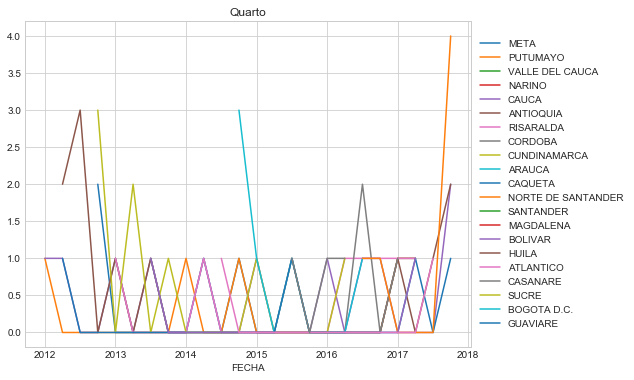

ANTIOQUIA
NORTE DE SANTANDER


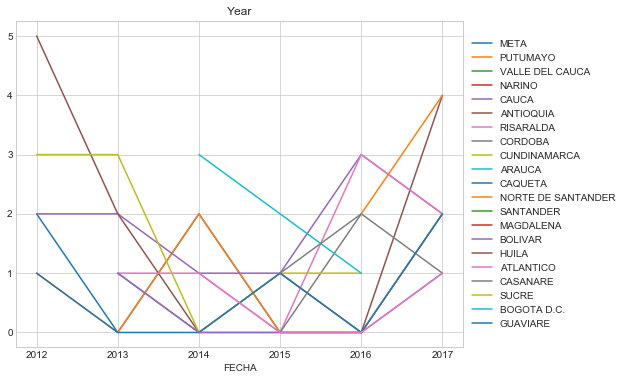

In [69]:
plt.figure(figsize=(8,6))
for dept in data_social.DEPARTAMENTO.unique():
    _tmpdf = data_social[(data_social.DEPARTAMENTO==dept) & (data_social.JAC==1)]
    if _tmpdf.shape[0]>0:
        _tmpdf.Deaths.resample('Q').sum().plot(label=dept)
plt.title('Quarto')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.savefig('Images/JAC_DEPTO_quarto.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

plt.figure(figsize=(8,6))
for dept in data_social.DEPARTAMENTO.unique():
    _tmpdf = data_social[(data_social.DEPARTAMENTO==dept) & (data_social.JAC==1)]
    if _tmpdf.shape[0]>0:
        tmpres = _tmpdf.Deaths.resample('A').sum()
        tmpres.plot(label=dept)
    if tmpres[-1]>2:
        print dept

lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.title('Year')
plt.savefig('Images/JAC_DEPTO_year.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## by municipio

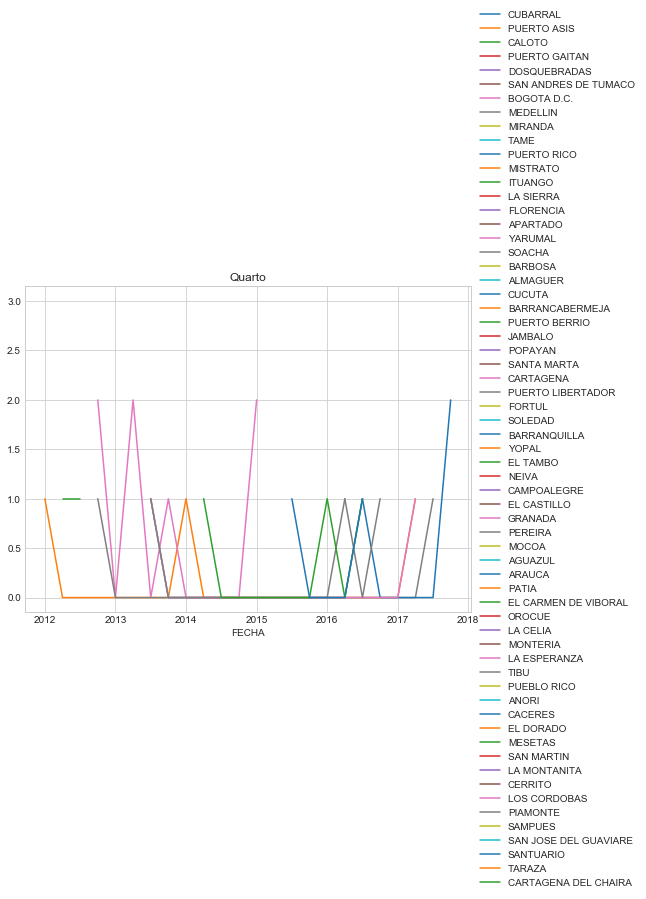

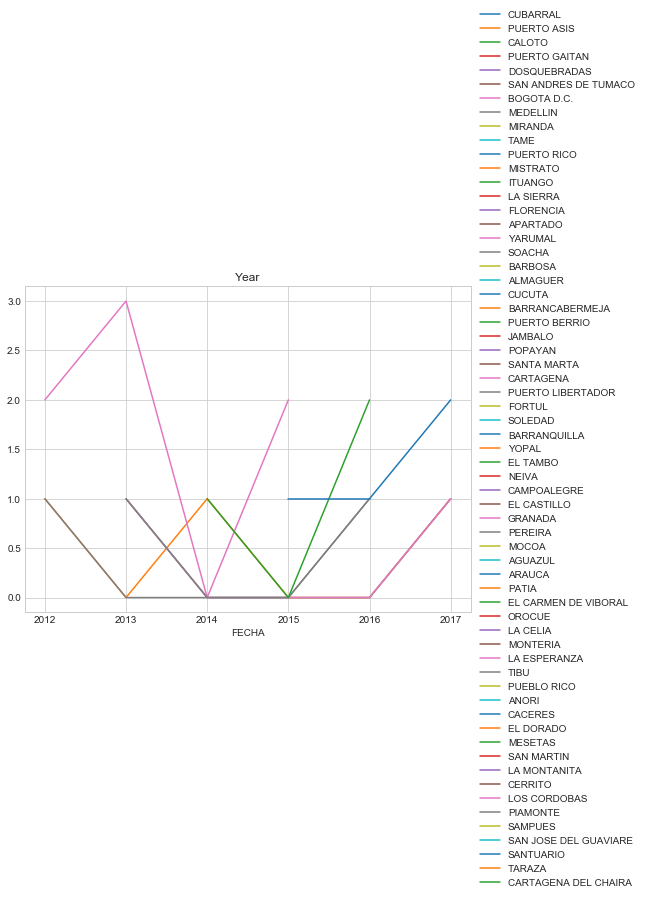

In [17]:
plt.figure(figsize=(8,6))
for dept in data_social.MUNICIPIO.unique():
    _tmpdf = data_social[(data_social.MUNICIPIO==dept) & (data_social.JAC==1)]
    if _tmpdf.shape[0]>0:
        _tmpdf.Deaths.resample('Q').sum().plot(label=dept)
plt.title('Quarto')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.savefig('Images/JAC_MUNI_quarto.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

plt.figure(figsize=(8,6))
for dept in data_social.MUNICIPIO.unique():
    _tmpdf = data_social[(data_social.MUNICIPIO==dept) & (data_social.JAC==1)]
    if _tmpdf.shape[0]>0:
        tmpres = _tmpdf.Deaths.resample('A').sum()
        tmpres.plot(label=dept)
    #if tmpres[-1]>2:
    #    print dept

lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.title('Year')
plt.savefig('Images/JAC_MUNI_year.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## JAC vs Lideres

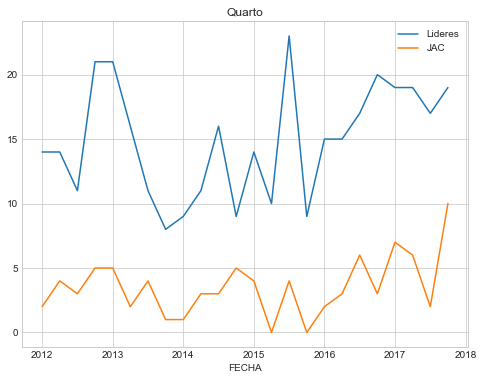

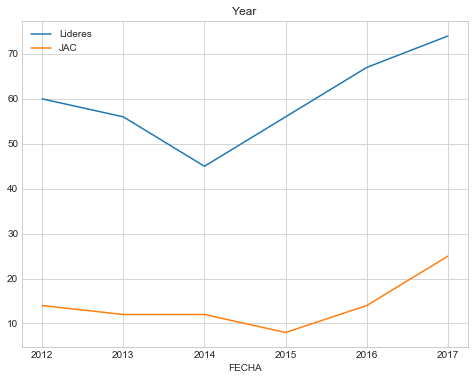

In [87]:
plt.figure(figsize=(8,6))
data_social.Deaths.resample('Q').sum().plot(label='Lideres')
df1 = data_social.JAC.resample('Q').sum()
df1.plot(label='JAC')
df1.to_csv('PlotData/JAC_TODOS_quarto.csv')
#dftmpfull[dftmpfull['NOMBRE DE LA ORGANIZACION'].str.contains('JAC ')==True].Deaths.resample('Q').sum().plot(label='JAC')
plt.title('Quarto')
lgd = plt.legend()
plt.savefig('Images/JAC_TODOS_quarto.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.figure(figsize=(8,6))
data_social.Deaths.resample('A').sum().plot(label='Lideres')
df1 = data_social.JAC.resample('A').sum()
df1.plot(label='JAC')
df1.to_csv('PlotData/JAC_TODOS_year.csv')
plt.title('Year')
lgd = plt.legend()
plt.savefig('Images/JAC_TODOS_year.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

## JAC vs Comunal

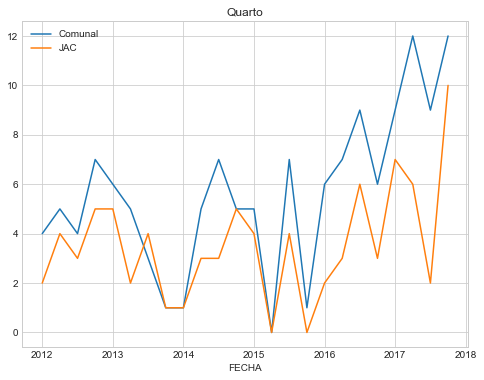

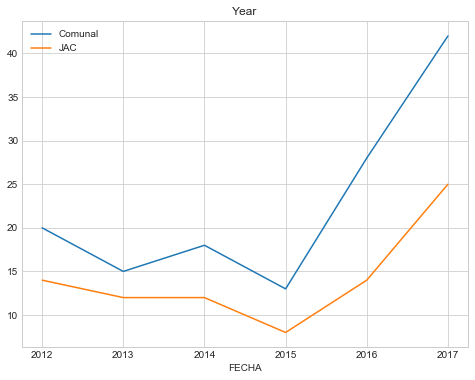

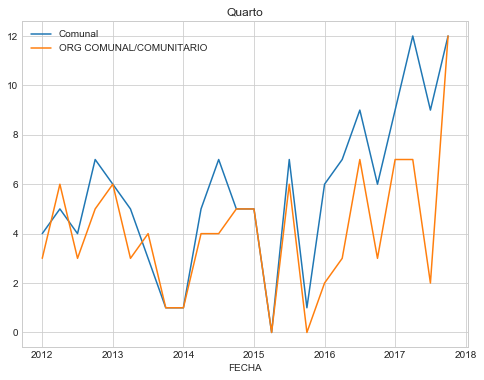

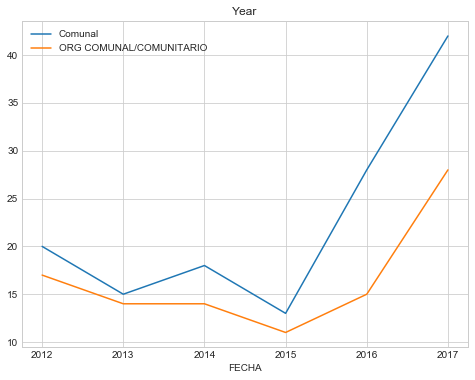

In [92]:
plt.figure(figsize=(8,6))
df2 = data_social.loc[data_social[u'TIPO DE ORGANIZACION']=='COMUNAL'].Deaths.resample('Q').sum()
df2.plot(label='Comunal')
df2.name = 'Comunal'
df1 = data_social.JAC.resample('Q').sum()
df1.plot(label='JAC')
df1.name = 'JAC'
df3 = pd.concat([df1,df2],axis=1)
df3.to_csv('PlotData/JAC_quarto.csv')
plt.title('Quarto')
lgd = plt.legend()
plt.savefig('Images/JAC_quarto.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.figure(figsize=(8,6))
df2 = data_social.loc[data_social[u'TIPO DE ORGANIZACION']=='COMUNAL'].Deaths.resample('A').sum()
df2.plot(label='Comunal')
df2.name = 'Comunal'
df1 = data_social.JAC.resample('A').sum()
df1.plot(label='JAC')
df1.name = 'JAC'
df3 = pd.concat([df1,df2],axis=1)
df3.to_csv('PlotData/JAC_year.csv')


plt.title('Year')
lgd = plt.legend()
plt.savefig('Images/JAC_year.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')


plt.figure(figsize=(8,6))
df1 = data_social.loc[data_social[u'TIPO DE ORGANIZACION']=='COMUNAL'].Deaths.resample('Q').sum()
df1.plot(label='Comunal')
df1.name = 'Comunal'
df2 = data_social[data_social['ORG COMUNAL/COMUNITARIO']==1].Deaths.resample('Q').sum()
df2.plot(label='ORG COMUNAL/COMUNITARIO')
df2.name='ORG COMUNAL/COMUNITARIO'
df3 = pd.concat([df1,df2],axis=1)
df3.to_csv('PlotData/ORG_COMUNAL_quarto.csv')


plt.title('Quarto')
lgd = plt.legend()
plt.savefig('Images/ORG_COMUNAL_quarto.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')


plt.figure(figsize=(8,6))
df1 = data_social.loc[data_social[u'TIPO DE ORGANIZACION']=='COMUNAL'].Deaths.resample('A').sum()
df1.plot(label='Comunal')
df1.name = 'Comunal'
df2 = data_social[data_social['ORG COMUNAL/COMUNITARIO']==1].Deaths.resample('A').sum()
df2.plot(label='ORG COMUNAL/COMUNITARIO')
df2.name = 'ORG COMUNAL/COMUNITARIO'
df3 = pd.concat([df1,df2],axis=1)
df3.to_csv('PlotData/ORG_COMUNAL_year.csv')


plt.title('Year')
lgd = plt.legend()
plt.savefig('Images/ORG_COMUNAL_year.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

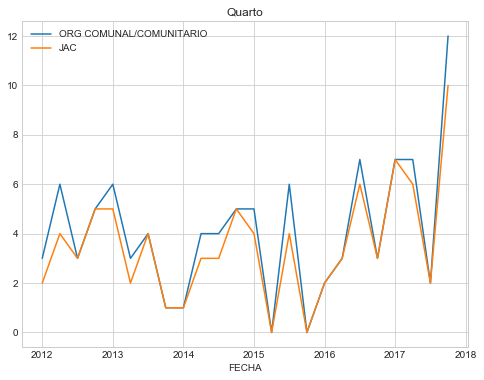

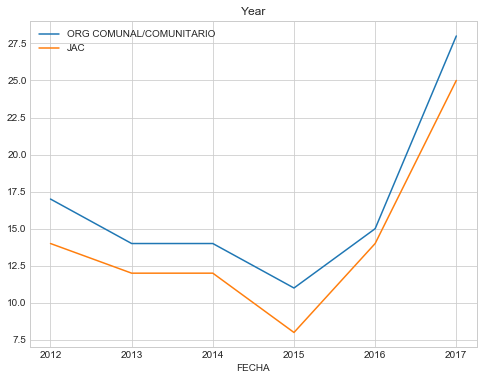

In [91]:
plt.figure(figsize=(8,6))
df1 = data_social[u'ORG COMUNAL/COMUNITARIO'].resample('Q').sum()
df1.plot(label='ORG COMUNAL/COMUNITARIO')
df1.name = 'ORG COMUNAL/COMUNITARIO'
df2 = data_social.JAC.resample('Q').sum()
df2.plot(label='JAC')
df2.name = 'JAC'
df3 = pd.concat([df1,df2],axis=1)
df3.to_csv('PlotData/JAC_ORG_COM_quarto.csv')


plt.title('Quarto')
lgd = plt.legend()
plt.savefig('Images/JAC_ORG_COM_quarto.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.figure(figsize=(8,6))

df1 = data_social[u'ORG COMUNAL/COMUNITARIO'].resample('A').sum()
df1.plot(label='ORG COMUNAL/COMUNITARIO')
df1.name = 'ORG COMUNAL/COMUNITARIO'
df2 = data_social.JAC.resample('A').sum()
df2.plot(label='JAC')
df2.name = 'JAC'
df3 = pd.concat([df1,df2],axis=1)
df3.to_csv('PlotData/JAC_ORG_COM_year.csv')

plt.title('Year')
lgd = plt.legend()
plt.savefig('Images/JAC_ORG_COM_year.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

## JAC ARMA

In [92]:
data_all.columns

Index([ u'ARMA EMPLEADA',         u'BARRIO',        u'BARRIOS',
       u'CLASE EMPLEADO',    u'CLASE SITIO',    u'CODIGO DANE',
         u'DEPARTAMENTO',            u'DIA',           u'EDAD',
          u'ESCOLARIDAD',   u'ESTADO CIVIL',          u'FECHA',
               u'GENERO',           u'HORA',  u'MOVIL AGRESOR',
        u'MOVIL VICTIMA',      u'MUNICIPIO',      u'PAIS NACE',
          u'PROFESIONES',           u'SEXO',           u'ZONA',
               u'Deaths'],
      dtype='object')

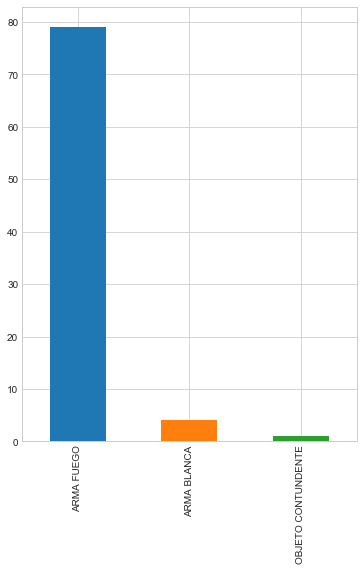

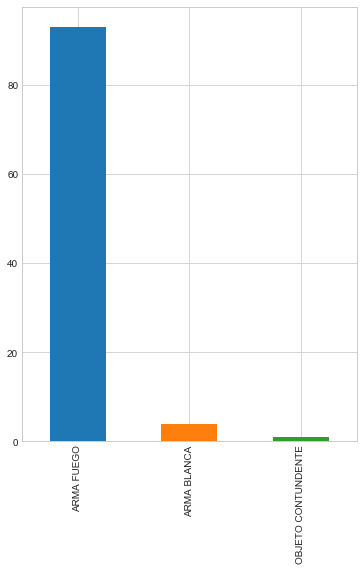

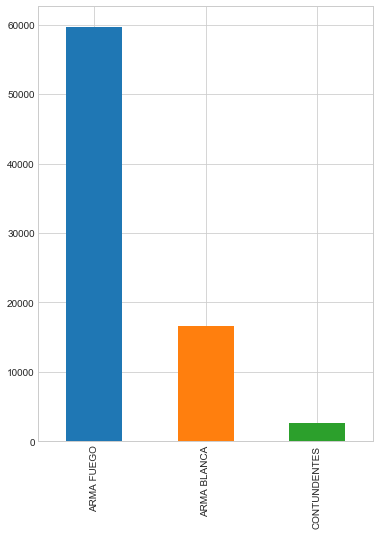

In [90]:
plt.figure(figsize=(6,8))
df1 = data_social.loc[data_social.JAC==1,u'ARMA EMPLEADA'].value_counts()
df1.plot(kind='bar')
df1.to_csv('PlotData/JAC_ARMA_EMPLEADA.csv')
plt.savefig('Images/JAC_ARMA_EMPLEADA.jpg',bbox_inches='tight')
plt.show()

plt.figure(figsize=(6,8))
df1 = data_social.loc[data_social[u'ORG COMUNAL/COMUNITARIO']==1,u'ARMA EMPLEADA'].value_counts()
df1.plot(kind='bar')
df1.to_csv('PlotData/ORG_COMUN_ARMA_EMPLEADA.csv')
plt.savefig('Images/ORG_COMUN_ARMA_EMPLEADA.jpg',bbox_inches='tight')
plt.show()

plt.figure(figsize=(6,8))
valcounts = data_all.loc[:,u'ARMA EMPLEADA'].value_counts()
valcounts[:3].plot(kind='bar')
valcounts[:3].to_csv('PlotData/ALL_ARMA_EMPLEADA.csv')
plt.savefig('Images/ALL_ARMA_EMPLEADA.jpg',bbox_inches='tight')
plt.show()

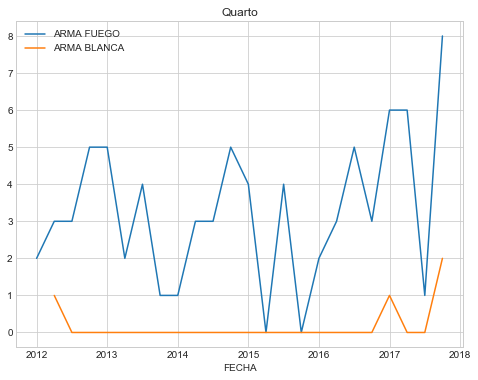

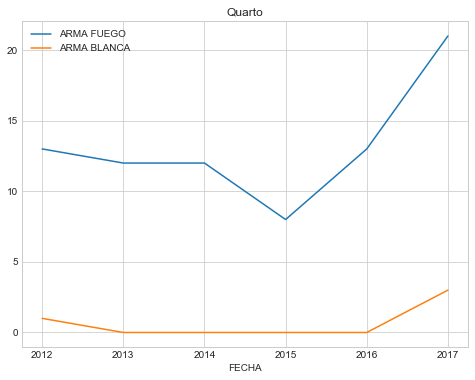

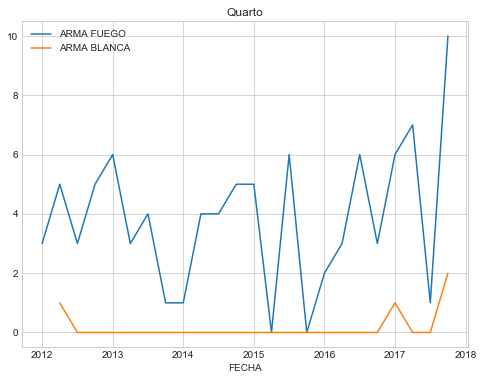

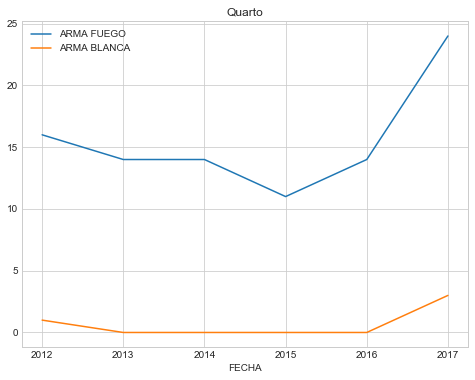

In [93]:
plt.figure(figsize=(8,6))
df1 = data_social.loc[(data_social.JAC==1)&(data_social[u'ARMA EMPLEADA']=='ARMA FUEGO')].Deaths.resample('Q').sum()
df1.plot(label='ARMA FUEGO')
df1.name = 'ARMA FUEGO'
df2 = data_social.loc[(data_social.JAC==1)&(data_social[u'ARMA EMPLEADA']=='ARMA BLANCA')].Deaths.resample('Q').sum()
df2.plot(label='ARMA BLANCA')
df2.name = 'ARMA BLANCA'
df3 = pd.concat([df1,df2],axis=1)
df3.to_csv('PlotData/JAC_ARMA_quarto.csv')


plt.title('Quarto')
lgd = plt.legend()
plt.savefig('Images/JAC_ARMA_quarto.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.figure(figsize=(8,6))
df1 = data_social.loc[(data_social.JAC==1)&(data_social[u'ARMA EMPLEADA']=='ARMA FUEGO')].Deaths.resample('A').sum()
df1.plot(label='ARMA FUEGO')
df1.name = 'ARMA FUEGO'
df2 = data_social.loc[(data_social.JAC==1)&(data_social[u'ARMA EMPLEADA']=='ARMA BLANCA')].Deaths.resample('A').sum()
df2.plot(label='ARMA BLANCA')
df2.name = 'ARMA BLANCA'
df3 = pd.concat([df1,df2],axis=1)
df3.to_csv('PlotData/JAC_ARMA_year.csv')

plt.title('Quarto')
lgd = plt.legend()
plt.savefig('Images/JAC_ARMA_year.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')


plt.figure(figsize=(8,6))
df1 = data_social.loc[(data_social[u'ORG COMUNAL/COMUNITARIO']==1)&(data_social[u'ARMA EMPLEADA']=='ARMA FUEGO')].Deaths.resample('Q').sum()
df1.plot(label='ARMA FUEGO')
df1.name = 'ARMA FUEGO'
df2 = data_social.loc[(data_social[u'ORG COMUNAL/COMUNITARIO']==1)&(data_social[u'ARMA EMPLEADA']=='ARMA BLANCA')].Deaths.resample('Q').sum()
df2.plot(label='ARMA BLANCA')
df2.name = 'ARMA BLANCA'

df3 = pd.concat([df1,df2],axis=1)
df3.to_csv('PlotData/ORG_COMUN_ARMA_quarto.csv')
plt.title('Quarto')
lgd = plt.legend()
plt.savefig('Images/ORG_COMUN_ARMA_quarto.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.figure(figsize=(8,6))
df1 = data_social.loc[(data_social[u'ORG COMUNAL/COMUNITARIO']==1)&(data_social[u'ARMA EMPLEADA']=='ARMA FUEGO')].Deaths.resample('A').sum()
df1.plot(label='ARMA FUEGO')
df1.name = 'ARMA FUEGO'
df2 = data_social.loc[(data_social[u'ORG COMUNAL/COMUNITARIO']==1)&(data_social[u'ARMA EMPLEADA']=='ARMA BLANCA')].Deaths.resample('A').sum()
df2.plot(label='ARMA BLANCA')
df2.name = 'ARMA FUEGO'
df3 = pd.concat([df1,df2],axis=1)
df3.to_csv('PlotData/ORG_COMUN_ARMA_year.csv')
plt.title('Quarto')
lgd = plt.legend()
plt.savefig('Images/ORG_COMUN_ARMA_year.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')

# Backup

### NANs?

In [45]:
data_social[pd.isna(data_social[u'TIPO DE ORGANIZACION'].values)]

,No.,SECCIONAL,SEXO,NOMBRE VICTIMA,APELLIDO,NOMBRES,CALIDAD DE LA VICTIMA,TIPO DE ORGANIZACION,ORGANIZACION A LA QUE PERTENECE,NOMBRE DE LA ORGANIZACION,...,FECHA,DEPARTAMENTO,MUNICIPIO,LUGAR ESPECIFICO,ARMA EMPLEADA,INDICIADOS O IMPUTADOS,SITUACION JURIDICA IMPUTADOS,ORDENES DE PROTECCION,FASE PRCESAL,Deaths
FECHA,,,,,,,,,,,,,,,,,,,,,
2013-02-22,41.0,PUTUMAYO,NaN,ORLANDO MARIA SOTO VEGA,NaN,NaN,LIDER COMUNAL,NaN,CASEIO CARMEN DEL PINUNA,NaN,...,2013-02-22 00:00:00,PUTUMAYO,PUERTO ASIS,PUERTO ASIS,ARMA DE FUEGO,AVERIGUACION RESPONSABLES,NaN,NaN,INDAGACION,1.0
2015-10-07,25.0,CAQUETA,MASCULINO,LUIS ANTONIO PERALTA CUELLAR,PERALTA CUELLAR,LUIS ANTONIO,PERIODISTA,NaN,EMISORA LINDA STEREO,NaN,...,2015-10-07 00:00:00,CAQUETA,EL DONCELLO,DONCELLO,ARMA DE FUEGO,YEAN ARLEX BUENAVENTURA BARRETO,MEDIDA DE ASEGURAMEINTO INTRAMURAL,NaN,SENTENCIA CONDENATORIA,1.0
2015-10-11,47.0,CALI,MASCULINO,EDGAR QUINTERO,QUINTERO,EDGAR,PERIODISTA RADIO LUNA,NaN,RADIO LUNA,RADIO LUNA,...,2015-10-11 00:00:00,VALLE DEL CAUCA,PALMIRA,"PALMIRA, VALLE",ARMA DE FUEGO,TRES PERSONAS VINCULADAS,"M,EDIDA DE ASEGURAMIETO INTRAMURAL",NaN,JUICIO,1.0


In [39]:
sum(pd.isna(data_social[data_social[u'TIPO DE ORGANIZACION']=='COMUNAL']['NOMBRE DE LA ORGANIZACION'].values))

17

In [12]:
dftmp = data_social.loc[data_social[u'TIPO DE ORGANIZACION']=='COMUNAL','NOMBRE DE LA ORGANIZACION']
dftmp2 = data_social.loc[data_social[u'TIPO DE ORGANIZACION']!='COMUNAL','NOMBRE DE LA ORGANIZACION']

In [14]:
dftmpfull = data_social.loc[data_social[u'TIPO DE ORGANIZACION']=='COMUNAL']
dftmpfull[dftmp.str.contains('JAC ') + dftmp.str.contains('JUNTA ')==0]['NOMBRE DE LA ORGANIZACION']

FECHA
2012-03-11                                           ASOCOMUNAL
2012-04-01                  CONSEJO COMUNITARIO MAYOR DE UNGUIA
2012-05-03                                           SINTRAOFAN
2012-01-07                                           BELLA FLOR
2012-10-17                                           NO REPORTA
2012-12-15                                  ASOCAMPROV-LIBERTAD
2013-05-09        PROCESO ORGANIZATIVO CENTRO COMUNITARIO CEPIA
2013-05-28          CONSEJO COMUNITARIO CUENCA DEL RIO ISCUANDE
2013-01-30                                 RIOS VIVOS ANTIOQUIA
2014-09-28                        ASOCIACION COMUNITARIA CEJAID
2014-04-26                           LIGA DE USUARIOS EL PUEBLO
2014-06-04                                           ASOCOMUNAL
2014-08-13                                                 NASA
2014-09-28                               ASOCIACION DE VIVIENDA
2014-07-27                                                 ANUC
2015-07-05                        

In [103]:
data_social[data_social['NOMBRE DE LA ORGANIZACION'].str.contains('COMUNITARIO')==True]['NOMBRE DE LA ORGANIZACION']

FECHA
2012-04-27                   CONSEJO COMUNITARIO BAJO GUAPI
2012-04-01              CONSEJO COMUNITARIO MAYOR DE UNGUIA
2013-05-09    PROCESO ORGANIZATIVO CENTRO COMUNITARIO CEPIA
2013-05-28      CONSEJO COMUNITARIO CUENCA DEL RIO ISCUANDE
2013-02-23                   CONSEJO COMUNITARIO LA CAUCANA
2013-02-13                         CENTRO COMUNITARIO CEPIA
2015-08-28                  CONSEJO COMUNITARIO RIO GUAJALO
2015-03-08                    CONSEJO COMUNITARIO ALTO MIRA
2017-04-27            CONSEJO COMUNITARIO GANAPLATA Y CANEI
2017-10-17                    CONSEJO COMUNITARIO ALTO MIRA
2017-11-26            CONSEJO COMUNITARIO LA LARGA TUMARADO
Name: NOMBRE DE LA ORGANIZACION, dtype: object

In [97]:
# AMONGST COMUNAL
print sum(dftmp.str.contains('CONSEJO COMUNITARIO')==True)
print sum(dftmp.str.contains('COMUNITARIO')==True)

5
6


In [99]:
# AMONGST ALL
print sum(data_social['NOMBRE DE LA ORGANIZACION'].str.contains('CONSEJO COMUNITARIO')==True)
print sum(data_social['NOMBRE DE LA ORGANIZACION'].str.contains('COMUNITARIO')==True)

9
11


In [42]:
print dftmp2.str.contains('JAC ').sum()
print dftmp2.str.contains('JUNTA ').sum()

7
0
